# Вводные данные

Наша компания является маркетплейсом товаров. У нас в приложении есть рекламные блоки, с помощью которых продавцы могут продвигать свои товары. Также через них мы можем информировать об акциях и скидочных днях, например, о Черной пятнице.
Сейчас первый рекламный блок расположен после 3 линий товаров бесконечной ленты (ленту товаров можно скроллить и рекламные блоки будут появляться среди товаров с какой-то периодичностью). В данном эксперименте мы будем рассматривать только ПЕРВЫЙ рекламный блок.
К нам пришел менеджер и просит провести АБ тест по размещению рекламы и сравнить места размещения.
Сейчас первый рекламный блок размещается в ленте товаров, менеджер хочет подвинуть рекламный блок наверх и сравнить результаты.
При клике на рекламный блок открывается подборка товаров.


**Задача:** Необходимо протестировать изменение расположения рекламы: для тест-группы секция рекламы должна будет располагаться над основной секцией.

**Цель:** Проверить гипотезу, что изменение расположения влияет на взаимодействие пользователей с рекламой

**Гипотеза:** Расположение рекламы над основной секцией положительно влияет на метрики (основные - кликабельность и конверсия).

**Основные метрики, которые хотим отслеживать:**

•	Конверсия в добавление товаров в корзину от захода в рекламу,

•	Кликабельность секции рекламы,

•	Конверсия в добавление товаров в корзину из рекламы от просмотра главной,

•	Конверсия в заказ от захода в рекламу,

•	Конверсия в заказ от просмотра главной,

•	Выручка на пользователя (ARPU) по товарам, добавленным из секции,

•	Выручка на покупателя (ARPPU) по товарам, добавленным из секции.


Успешным тестирование считаем, если ключевая метрика АБ теста секции рекламы значимо увеличиваются.

**Ограничения:** Мы уже проводили подобный эксперимент и получили реальный эффект увеличения ключевой метрики на 2,5%. Эксперимент проводился 1 неделю. Такой же период необходимо взять и в этот раз, потому что потом в каталоге магазина планируются изменения.

# Дизайн

## Гипотеза

**Нулевая гипотеза Н0:** Изменение расположения рекламы на странице не повлияет на взаимодействие пользователей с рекламой.

**Альтернативная гипотеза:** Расположение рекламы над основной секцией положительно повлияет на ключевые метрики, такие как кликабельность и конверсия.



## Уровень значимости

**Устанавливаем на уровне 5%.**

## Мощность теста

**Устанавливаем на уровне 80%**

## Длительность теста

Длительность теста 7 дней (1 неделя - задано клиентом)

## Выбор метрик

### Ключевая метрика (метрика успеха)

**Конверсия в добавление товаров в корзину от захода в рекламу (CR)**: Поможет оценить, насколько эффективно реклама стимулирует добавление товаров в корзину.







### Вспомогательные метрики

#### Guardrail Метрики (защитные метрики):
Эти метрики помогают убедиться, что изменения не приводят к негативным последствиям для других аспектов пользовательского опыта.


**- Конверсия в заказ от просмотра главной:** Эта метрика поможет убедиться, что изменение расположения рекламы не снижает общую конверсию в заказы с главной страницы.

**- Выручка на пользователя (ARPU):** Следите за тем, чтобы изменение расположения рекламы не снижало общую выручку на пользователя.


#### Informative Метрики (информативные метрики):
Эти метрики предоставят дополнительную информацию о том, как именно изменение влияет на пользовательское поведение.


- **Кликабельность секции рекламы (CTR)**: Эта метрика измеряет, насколько часто пользователи кликают на рекламный блок относительно числа его показов. Изменение расположения может значительно повлиять на видимость и привлекательность рекламы.

- **Конверсия в добавление товаров в корзину из рекламы от просмотра главной:** Даст понимание о влиянии рекламы на добавление товаров в корзину относительно общего трафика с главной страницы.

- **Конверсия в заказ от захода в рекламу:** Позволит измерить, насколько заходы с рекламы конвертируются в заказы.

- **Выручка на покупателя (ARPPU) по товарам, добавленным из секции**: Поможет понять, как изменилось поведение покупателей, которые взаимодействовали с рекламой, в плане потраченной суммы.


## Загрузка "исторических" данных. Подготовка данных

In [ ]:
import pandas as pd
data_raw = pd.read_csv('/content/drive/MyDrive/А В-тесты/Финальный АВ-тест/data_raw.csv')

In [ ]:
data_raw


,Unnamed: 0,client_id,dt,event_type
0,0,6095092,2024-06-20,clicks
1,1,541138559,2024-06-18,clicks
2,2,12189072,2024-06-20,clicks
3,3,674385020,2024-06-20,clicks
4,4,726939378,2024-06-20,clicks
...,...,...,...,...
27756043,27756043,819589730,2024-06-21,views
27756044,27756044,680187923,2024-06-20,views
27756045,27756045,519794764,2024-06-20,views
27756046,27756046,898541720,2024-06-21,views


In [ ]:
data_raw.columns

Index(['Unnamed: 0', 'client_id', 'dt', 'event_type'], dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Приведение типов данных

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27756048 entries, 0 to 27756047
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   client_id   int64 
 2   dt          object
 3   event_type  object
dtypes: int64(2), object(2)
memory usage: 847.0+ MB


In [ ]:
# Приводим дату к типу datetime

# Преобразуем колонку 'dt' к типу datetime
data_raw['dt'] = pd.to_datetime(data_raw['dt'], errors='coerce')  #параметр errors='coerce':
# Если в колонке есть значения, которые не могут быть преобразованы в дату,
# они будут заменены на NaT (Not a Time), что позволяет избежать ошибок.

# После преобразования проверем измененные типы данных
data_raw.dtypes

# Обратите внимание на параметр errors='coerce':
# Если в колонке есть значения, которые не могут быть преобразованы в дату,
# они будут заменены на NaT (Not a Time), что позволяет избежать ошибок.

,0
Unnamed: 0,int64
client_id,int64
dt,datetime64[ns]
event_type,object


### Поиск пропусков и дублей в данных

In [ ]:
data_raw.isna().sum()

,0
Unnamed: 0,0
client_id,0
dt,0
event_type,0


Пропусков в данных нет.

In [ ]:
data_raw.duplicated().sum()

np.int64(0)

Дублирующихся записей нет

## Определение временного диапазона данных

In [ ]:
# Определение минимальной и максимальной даты
start_date = data_raw['dt'].min()
end_date = data_raw['dt'].max()

print(f"Данные собраны за период с {start_date} по {end_date}.")


Данные собраны за период с 2024-06-17 00:00:00 по 2024-06-21 00:00:00.


Данные собраны за период с 17 по 21 июня 2024г.

## Анализ поведения пользователей

### Анализ активности пользователей

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Считаем количество уникальных client_id
unique_users_count = data_raw['client_id'].nunique()
print(f'Общее количество уникальных пользователей: {unique_users_count}')

Общее количество уникальных пользователей: 3102736


За период с 17 по 21 июня 2024г общее количество уникальных пользователей составило 3 102 736 человек.

        Date  UniqueUsers
0 2024-06-17      1118465
1 2024-06-18      1843719
2 2024-06-19      2384623
3 2024-06-20      1831314
4 2024-06-21      1100508


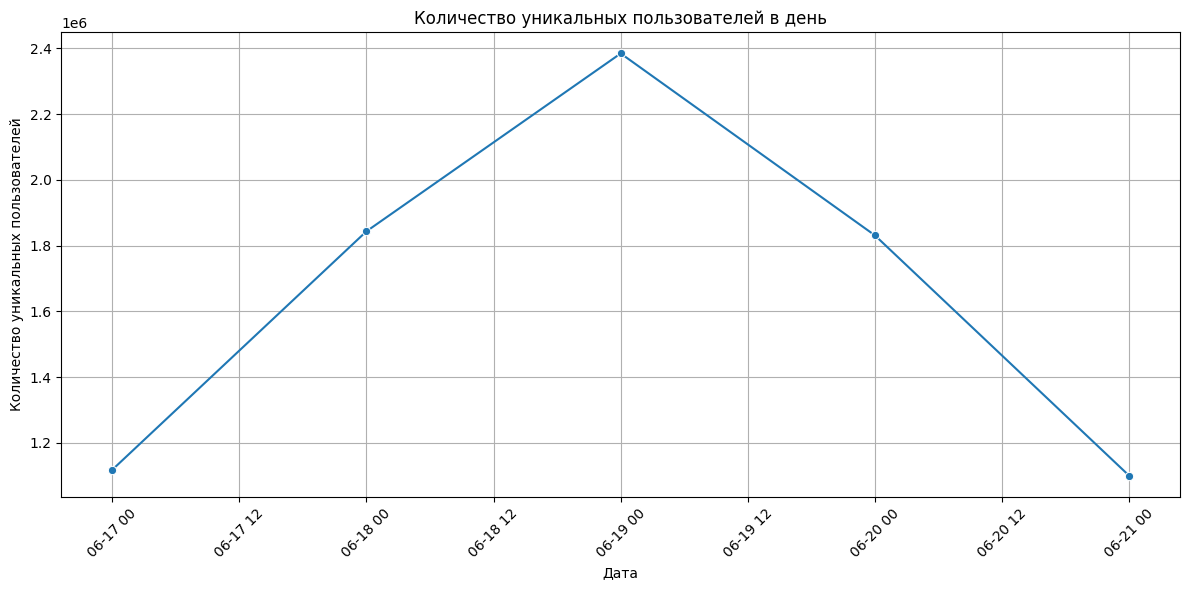

In [ ]:
# Группируем данные по дате и считаем количество уникальных пользователей в день
unique_users_per_day = data_raw.groupby('dt')['client_id'].nunique().reset_index()

# Переименуем колонки для удобства
unique_users_per_day.columns = ['Date', 'UniqueUsers']

# Выводим полученную таблицу
print(unique_users_per_day)

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(data=unique_users_per_day, x='Date', y='UniqueUsers', marker='o')
plt.title('Количество уникальных пользователей в день')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Находим среднее количество уникальных пользователей в день
average_uniqueusers = unique_users_per_day['UniqueUsers'].mean()

print(f'Среднее значение по колонке UniqueUsers: {average_uniqueusers}')

Среднее значение по колонке UniqueUsers: 1655725.8


Среднее количество пользователей в день составляет 1 655 726 человек.

In [ ]:
# Подсчет количества событий каждого типа
event_counts = data_raw['event_type'].value_counts().reset_index()
event_counts.columns = ['event_type', 'count']

print(event_counts)

  event_type     count
0      views  27006473
1     clicks    535927
2       adds    213648


count    8.278629e+06
mean     3.352735e+00
std      3.360870e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.440000e+02
dtype: float64


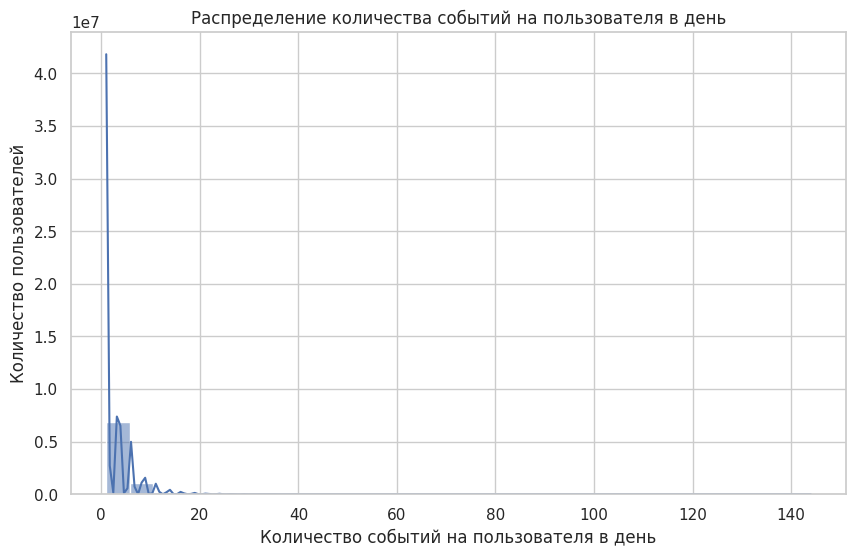

In [ ]:
# Считаем количество событий на пользователя в день
events_per_user_per_day = data_raw.groupby(['client_id', 'dt']).size()

# Выводим распределение
print(events_per_user_per_day.describe())

# Визуализируем распределение
plt.figure(figsize=(10, 6))
sns.histplot(events_per_user_per_day, bins=30, kde=True)
plt.title('Распределение количества событий на пользователя в день')
plt.xlabel('Количество событий на пользователя в день')
plt.ylabel('Количество пользователей')
plt.show()

#### Выводы

1. **Общее количество записей (`count`)**: 8 278 629
   - Это количество записей в выборке, что свидетельствует о большом размере данных. Каждая запись соответствует количеству событий для определенного пользователя в конкретный день.

2. **Среднее (`mean`)**: 3.35
   - В среднем, каждый пользователь совершает около 3.35 событий в день. Это значение является общим индикатором активности пользователей.

3. **Стандартное отклонение (`std`)**: 3.36
   - Стандартное отклонение показывает, насколько сильно варьируется количество событий на пользователя в день. Значение 3.36 указывает на относительно высокую изменчивость, что говорит о том, что активность пользователей может значительно различаться.

4. **Минимальное значение (`min`)**: 1
   - Минимальное количество событий на пользователя в день составляет 1. Это значит, что каждый пользователь, по крайней мере, совершает одно событие в день.

5. **Первый квартиль (25%)**: 1
   - 25% пользователей совершают не более одного события в день. Это говорит о том, что значительная часть пользователей имеет низкий уровень активности.

6. **Медиана (50%)**: 2
   - Половина пользователей совершают до двух событий в день. Медиана меньше среднего, что указывает на наличие пользователей, совершающих большое количество событий (влияющих на среднее).

7. **Третий квартиль (75%)**: 4
   - 75% пользователей совершают до четырех событий в день. Это говорит о том, что большинство пользователей не превышают эту границу активности.

8. **Максимальное значение (`max`)**: 144
   - Максимальное количество событий на одного пользователя в день составляет 144. Это может указывать на наличие чрезвычайно активных пользователей или аномальных данных, которые стоит изучить более подробно.

**Общие выводы**:
- Распределение имеет положительную асимметрию (right-skewed), что подтверждается тем, что среднее больше медианы. Это типично для данных, где существует значительное количество пользователей с низкой активностью и несколько пользователей с очень высокой активностью.
- Высокое максимальное значение может указывать на аномалии или на наличие пользователей с необычно высокой активностью, что может потребовать дальнейшего анализа.
- Значительная часть пользователей (75%) совершает не более 4 событий в день, что может быть показателем типичного поведения в системе.

### Анализ пользовательских сессий

In [ ]:
# Сортируем данные по client_id и дате события
data_raw.sort_values(by=['client_id', 'dt'], inplace=True)

# Группируем данные по client_id и дате, чтобы определить активность пользователя за день
# Используем оптимизированный метод для объединения событий
daily_activity = (
    data_raw.groupby(['client_id', 'dt'])['event_type']
    .apply(lambda x: ' -> '.join(x))
    .reset_index()
    .rename(columns={'event_type': 'session_sequence'})
)

# Выведем результат
print(daily_activity)

         client_id         dt  \
0                1 2024-06-17   
1                1 2024-06-19   
2                3 2024-06-17   
3                3 2024-06-18   
4                3 2024-06-19   
...            ...        ...   
8278624  957956796 2024-06-20   
8278625  957956933 2024-06-19   
8278626  957958290 2024-06-19   
8278627  957958290 2024-06-20   
8278628  957958290 2024-06-21   

                                          session_sequence  
0                                  views -> views -> views  
1                                           views -> views  
2                                          clicks -> views  
3        clicks -> views -> views -> views -> views -> ...  
4        adds -> clicks -> clicks -> views -> views -> ...  
...                                                    ...  
8278624                                              views  
8278625                                              views  
8278626                                              v

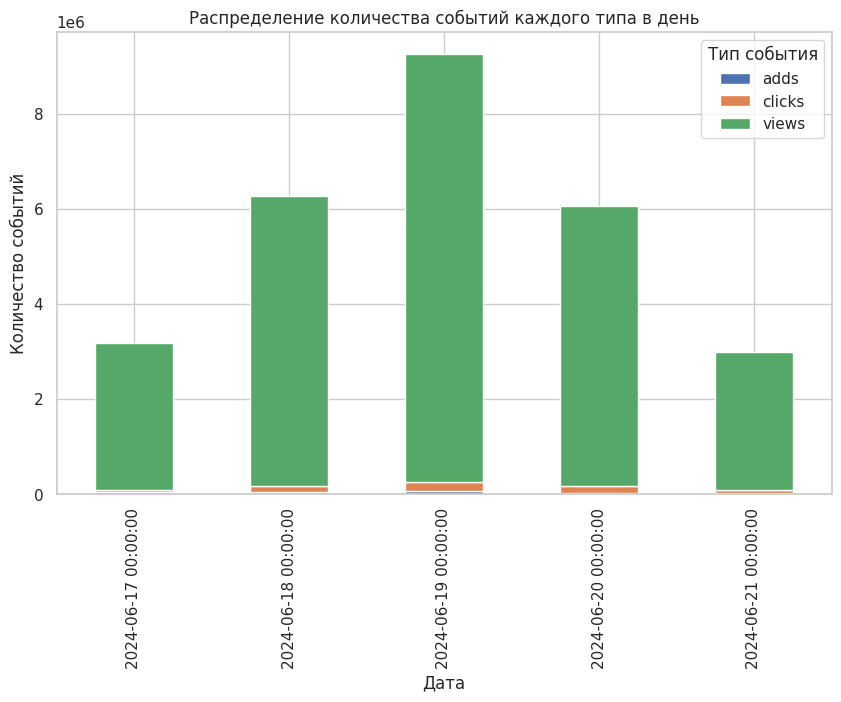

In [ ]:
# Построим распределение количества событий каждого типа в день
event_counts = data_raw.groupby(['dt', 'event_type']).size().unstack().fillna(0)

# Визуализация
event_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение количества событий каждого типа в день')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.legend(title='Тип события')
plt.show()

In [ ]:
event_counts

event_type,adds,clicks,views
date,,,
2024-06-17,36988,49189,3096944
2024-06-18,37599,132083,6098293
2024-06-19,71225,178680,9004922
2024-06-20,34034,129753,5903206
2024-06-21,33802,46222,2903108


#### Выводы

1. **Общая активность**: Активность пользователей варьируется в зависимости от дня. Самый высокий уровень взаимодействия (события всех типов) наблюдается 19 июня 2024 года. Это может быть связано с продвижением, запуском новой функции или другим событием, вызывающим интерес пользователей.

2. **Добавления (adds)**:
   - 19 июня наблюдается значительный всплеск добавлений (71225), что более чем в два раза превышает цифры других дней. Это может указывать на успешную маркетинговую кампанию или другой фактор, стимулирующий пользователей добавлять больше контента.

3. **Клики (clicks)**:
   - 19 июня также отмечен наибольшим числом кликов (178680), что поддерживает гипотезу о повышенном интересе или активности на платформе в этот день.
   - 18 и 20 июня также показывают высокий уровень кликов, но ниже, чем 19 июня.

4. **Просмотры (views)**:
   - 19 июня вновь лидирует по числу просмотров (9004922), что соответствует общей тенденции увеличения активности в этот день.
   - 18 июня также показывает значительное число просмотров (6098293), что может указывать на последовательность событий или акций, поддерживающих интерес пользователей.

5. **Тенденции**:
   - Наблюдается резкий пик активности 19 июня во всех категориях событий. Это может быть связано с внутренними факторами (например, обновлениями платформы) или внешними (например, сезонными изменениями в поведении пользователей).
   - В остальные дни показатели более равномерные и существенно ниже, чем 19 июня.


### Приведение данных к формату воронки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем данные
data_raw['dt'] = pd.to_datetime(data_raw['dt'])

# Создаем сводную таблицу
pivot_table = data_raw.pivot_table(
    index=['client_id', 'dt'],
    columns='event_type',
    values='Unnamed: 0',
    aggfunc='count',
    fill_value=0
)

# Приводим данные к бинарному формату
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Сбрасываем индекс и переименовываем колонки
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None
pivot_table.rename(columns={'view': 'views', 'click': 'clicks', 'add': 'adds'}, inplace=True)





<ipython-input-78-48be0dea76ad>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
pivot_table

,client_id,dt,adds,clicks,views
0,1,2024-06-17,0,0,1
1,1,2024-06-19,0,0,1
2,3,2024-06-17,0,1,1
3,3,2024-06-18,0,1,1
4,3,2024-06-19,1,1,1
...,...,...,...,...,...
8278624,957956796,2024-06-20,0,0,1
8278625,957956933,2024-06-19,0,0,1
8278626,957958290,2024-06-19,0,0,1
8278627,957958290,2024-06-20,0,0,1


In [ ]:
pivot_table.columns

Index(['client_id', 'dt', 'adds', 'clicks', 'views'], dtype='object')

<ipython-input-80-f2623a26169b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Users', data=funnel_data, palette='Blues_d')


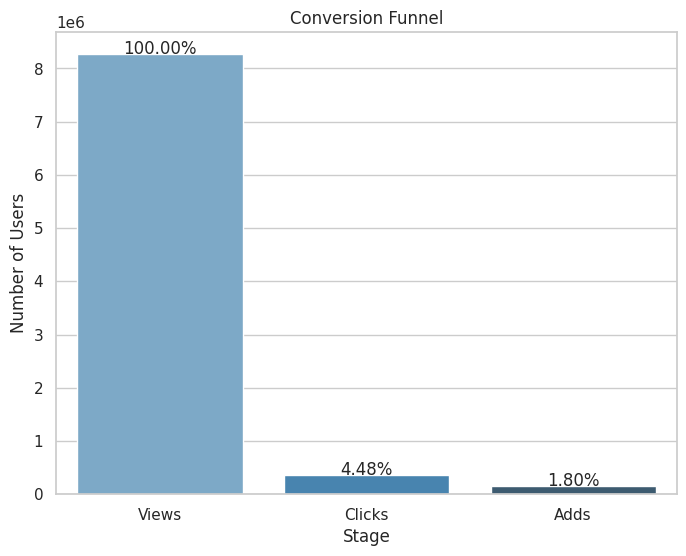

In [ ]:
# Рассчитываем количество пользователей на каждом этапе
views_count = pivot_table['views'].sum()
clicks_count = pivot_table['clicks'].sum()
adds_count = pivot_table['adds'].sum()

# Создаем DataFrame для воронки
funnel_data = pd.DataFrame({
    'Stage': ['Views', 'Clicks', 'Adds'],
    'Users': [views_count, clicks_count, adds_count]
})

# Рассчитываем процентные показатели перехода
funnel_data['Percentage'] = 100 * funnel_data['Users'] / funnel_data['Users'].iloc[0]

# Визуализация воронки
plt.figure(figsize=(8, 6))
sns.barplot(x='Stage', y='Users', data=funnel_data, palette='Blues_d')
plt.title('Conversion Funnel')
plt.ylabel('Number of Users')
plt.xlabel('Stage')

# Добавляем процентные показатели
for i in range(len(funnel_data)):
    plt.text(i, funnel_data['Users'][i] + 0.5, f"{funnel_data['Percentage'][i]:.2f}%", ha='center')

plt.show()

In [ ]:
funnel_data

,Stage,Users,Percentage
0,Views,8267094,100.000000
1,Clicks,370039,4.476047
2,Adds,148700,1.798697


### Расчет CR и CTR

CR = adds / clicks (конверсия в добавление)

CTR = clicks / views (конверсия в просмотр)





In [ ]:
# Группируем данные по пользователю
user_metrics = pivot_table.groupby('client_id').agg({
    'views': 'sum',  # Общее количество просмотров
    'clicks': 'sum', # Общее количество кликов
    'adds': 'sum'    # Общее количество добавлений
}).reset_index()

# Расчет CTR (конверсия в просмотр)
user_metrics['ctr'] = user_metrics['clicks'] / user_metrics['views']

# Расчет конверсии в добавление (CR)
user_metrics['add_conversion'] = user_metrics['adds'] / user_metrics['clicks']

# Заменяем NaN на 0 (если не было кликов или просмотров)
user_metrics['ctr'] = user_metrics['ctr'].fillna(0)
user_metrics['add_conversion'] = user_metrics['add_conversion'].fillna(0)

# Результат
print(user_metrics.head(20))

    client_id  views  clicks  adds   ctr  add_conversion
0           1      2       0     0  0.00        0.000000
1           3      4       3     1  0.75        0.333333
2           4      4       0     0  0.00        0.000000
3          19      4       0     0  0.00        0.000000
4          27      2       0     0  0.00        0.000000
5          36      1       0     0  0.00        0.000000
6          37      3       0     0  0.00        0.000000
7          41      4       1     2  0.25        2.000000
8          44      2       0     0  0.00        0.000000
9          53      1       0     0  0.00        0.000000
10         63      1       0     0  0.00        0.000000
11         68      5       0     0  0.00        0.000000
12         84      3       0     0  0.00        0.000000
13         86      1       0     0  0.00        0.000000
14         87      2       0     0  0.00        0.000000
15        106      3       0     0  0.00        0.000000
16        109      1       0   

In [ ]:
# Суммируем данные по всем пользователям
total_views = user_metrics['views'].sum()
total_clicks = user_metrics['clicks'].sum()
total_adds = user_metrics['adds'].sum()

# Расчет общей базовой конверсии в просмотр (CTR)
overall_ctr = total_clicks / total_views

# Расчет общей конверсии в добавление (CR)
overall_add_conversion = total_adds / total_clicks

# Вывод результатов
print(f"Общая базовая конверсия в просмотр (CTR): {overall_ctr:.4f} или {overall_ctr * 100:.2f}%")
print(f"Общая конверсия в добавление: {overall_add_conversion:.4f} или {overall_add_conversion * 100:.2f}%")

Общая базовая конверсия в просмотр (CTR): 0.0448 или 4.48%
Общая конверсия в добавление: 0.4018 или 40.18%


- Общая базовая конверсия в просмотр (CTR): 0.0448 или 4.48%
- Общая конверсия в добавление (CR): 0.4018 или 40.18%  

In [ ]:
# Функция для расчета коэффициента конверсии
def calculate_cr(data):
    cr = []
    for i in range(1, len(data)):
        conversion_rate = (data['Users'][i] / data['Users'][i - 1]) * 100
        cr.append(conversion_rate)
    cr.insert(0, 100.0)  # Первичный этап считаем как 100%
    return cr

# Рассчитываем коэффициент конверсии
funnel_data['Conversion Rate (%)'] = calculate_cr(funnel_data)

print(funnel_data)

    Stage    Users  Percentage  Conversion Rate (%)
0   Views  8267094  100.000000           100.000000
1  Clicks   370039    4.476047             4.476047
2    Adds   148700    1.798697            40.184953


### Выводы о поведении пользователей

1. **Общая активность пользователей**

- В период с 17 по 21 июня 2024 года общее количество уникальных пользователей составило 3 102 736 человек , что говорит о значительной аудитории платформы.
- Среднее количество пользователей в день — 1 655 726 человек , при этом активность пользователей имеет колебания: пик приходится на 19 июня (2 384 623 уникальных пользователей) , а минимум — на 21 июня (1 100 508 уникальных пользователей) . Это может быть связано с сезонностью, маркетинговыми активностями или выходными днями.

2. **Распределение событий**

- Общее количество записей (событий) в выборке составило 8 278 629 , что указывает на высокую активность пользователей.
- Среднее количество событий на пользователя в день — 3.35 , а медианное значение — 2.00 .
 - Медиана меньше среднего, что свидетельствует о наличии небольшой группы пользователей с очень высокой активностью (выбросы), влияющих на среднее значение.
 - Стандартное отклонение (3.36) подтверждает высокую изменчивость активности пользователей: некоторые пользователи совершают всего 1 событие в день , тогда как другие — до 144 событий .

3. **Конверсии**

- Общая базовая конверсия в просмотр (CTR) составляет 4.48% , что является достаточно низким показателем. (Возможно, требуется оптимизация пользовательского пути для повышения CTR.)
- Общая конверсия в добавление (CR) составляет 40.18% , что является относительно высоким показателем. Это говорит о том, что:
 - Пользователи, которые уже перешли к кликам, склонны совершать целевое действие (добавление).
 - Однако низкий CTR ограничивает общий объем добавлений, так как малая доля пользователей переходит от просмотров к кликам.

4. **Активность пользователей**

- Распределение событий на пользователя:
 - 25% пользователей совершают не более одного события в день , что говорит о низкой активности значительной части аудитории.
 - 75% пользователей совершают до четырех событий в день , что является основной массой пользователей.
 - Наличие пользователей с 144 событиями в день может указывать на аномалии (например, боты или технические ошибки). Эти случаи требуют дополнительного исследования для очистки данных.

**Итог**

Платформа имеет большую и активную аудиторию, но основная проблема заключается в низком уровне перехода от просмотров к кликам (CTR = 4.48% ). При этом пользователи, которые переходят к кликам, демонстрируют высокую конверсию в добавления (CR = 40.18% ). Для роста ключевых метрик необходимо сосредоточиться на повышении CTR и улучшении пользовательского опыта.

## Расчет выборочного среднего и дисперсии

In [ ]:
import numpy as np

# Расчет выборочного среднего для каждой метрики
mean_adds = np.mean(pivot_table['adds'])
mean_clicks = np.mean(pivot_table['clicks'])
mean_views = np.mean(pivot_table['views'])

print(f"Среднее adds: {mean_adds}")
print(f"Среднее clicks: {mean_clicks}")
print(f"Среднее views: {mean_views}")

# Расчет дисперсии для каждой метрики
var_adds = np.var(pivot_table['adds'], ddof=1)
var_clicks = np.var(pivot_table['clicks'], ddof=1)
var_views = np.var(pivot_table['views'], ddof=1)

print(f"Дисперсия adds: {var_adds}")
print(f"Дисперсия clicks: {var_clicks}")
print(f"Дисперсия views: {var_views}")

# Расчет дисперсии ratio-метрики с использованием дельта-метода
def var_ratio(x, y):  # x/y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    cov_xy = np.cov(x, y, ddof=1)[0][1]
    result = var_x / mean_y**2 + var_y * mean_x**2 / mean_y**4 - 2 * mean_x * cov_xy / mean_y**3
    return result

# Пример расчета дисперсии для ratio-метрики clicks/views
var_ratio_clicks_views = var_ratio(pivot_table['clicks'], pivot_table['views'])
print(f"Дисперсия ratio-метрики clicks/views: {var_ratio_clicks_views}")

# Расчет дисперсии для ratio-метрики adds/clicks
var_ratio_adds_clicks = var_ratio(pivot_table['adds'], pivot_table['clicks'])
print(f"Дисперсия ratio-метрики adds/clicks: {var_ratio_adds_clicks}")

Среднее adds: 0.017961911326138665
Среднее clicks: 0.04469810158179573
Среднее views: 0.9986066533480362
Дисперсия adds: 0.017639283199924968
Дисперсия clicks: 0.042700186449900264
Дисперсия views: 0.0013914054049494688
Дисперсия ratio-метрики clicks/views: 0.04292294406507744
Дисперсия ratio-метрики adds/clicks: 8.65983715342766


Диспесия для CR составляет 8.66

In [ ]:
# Рассчитываем среднее значение для каждой из интересующих колонок
mean_adds = pivot_table['adds'].mean()
mean_clicks = pivot_table['clicks'].mean()
mean_views = pivot_table['views'].mean()

print(f"Среднее добавлений: {mean_adds}")
print(f"Среднее кликов: {mean_clicks}")
print(f"Среднее просмотров: {mean_views}")

# Рассчитываем стандартное отклонение для каждой из интересующих колонок
std_dev_adds = pivot_table['adds'].std(ddof=1)  # Используем ddof=1 для несмещенной оценки
std_dev_clicks = pivot_table['clicks'].std(ddof=1)
std_dev_views = pivot_table['views'].std(ddof=1)

print(f"Стандартное отклонение добавлений: {std_dev_adds}")
print(f"Стандартное отклонение кликов: {std_dev_clicks}")
print(f"Стандартное отклонение просмотров: {std_dev_views}")

Среднее добавлений: 0.017961911326138665
Среднее кликов: 0.04469810158179573
Среднее просмотров: 0.9986066533480362
Стандартное отклонение добавлений: 0.13281296322243913
Стандартное отклонение кликов: 0.20664023434437995
Стандартное отклонение просмотров: 0.037301546951158324


## Расчет MDE

In [ ]:
from scipy import stats
import numpy as np

def get_MDE(mu, std, sample_size, n_groups=2, target_share=0.5, r=1, alpha=0.05, beta=0.2):
    t_alpha = stats.norm.ppf(1 - (alpha / 2))
    comparisons = n_groups - 1
    t_beta = stats.norm.ppf(1 - beta)
    sample_ratio_correction = r + 2 + 1 / r

    mde_absolute = np.sqrt(sample_ratio_correction) * (t_alpha + t_beta) * std / np.sqrt(
        sample_size * (1 - target_share * (comparisons - 1))
    )
    mde_relative = (mde_absolute / mu) * 100  # Относительный MDE в процентах
    return mde_absolute, mde_relative

# Ваши данные
mu = 0.4018
std = np.sqrt(mu * (1 - mu))  # 0.4904
sample_size = 4000  # Общий размер выборки (2 группы по 2000)
n_groups = 2
target_share = 0.5
r = 1
alpha = 0.05
beta = 0.2

# Расчет MDE
mde_absolute, mde_relative = get_MDE(
    mu=mu,
    std=std,
    sample_size=sample_size,
    n_groups=n_groups,
    target_share=target_share,
    r=r,
    alpha=alpha,
    beta=beta
)

print(f"Абсолютный MDE: {mde_absolute:.2%}")
print(f"Относительный MDE: {mde_relative:.1f}%")

Абсолютный MDE: 4.34%
Относительный MDE: 10.8%


**MDE 4.34%**

## Расчет размера аудитории

In [ ]:
from scipy import stats
import numpy as np

def get_sample_size(mu, var, mde, r=1, alpha=0.05, beta=0.2):
    t_alpha = stats.norm.ppf(1 - (alpha / 2))  # 1.96 для α=0.05
    t_beta = stats.norm.ppf(1 - beta)          # 0.84 для β=0.2
    sample_size = (r + 1) / r * var * (t_alpha + t_beta)**2 / (mde * mu)**2
    return sample_size

# Параметры
mu = 0.4018
var = mu * (1 - mu)  # 0.2404
mde_relative = 0.108  # 10.8% относительный MDE
r = 1

# Расчет
sample_size_per_group = get_sample_size(mu, var, mde_relative, r)
total_sample_size = 2 * sample_size_per_group

print(f"Размер выборки на одну группу: {sample_size_per_group:.0f}")
print(f"Общий размер выборки для двух групп: {total_sample_size:.0f}")

Размер выборки на одну группу: 2004
Общий размер выборки для двух групп: 4007


## Таблица MDE/Размер выборки

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def get_sample_size(mu, var, mde_relative, r=1, alpha=0.05, beta=0.2):
    """Расчет размера выборки для одной группы."""
    t_alpha = stats.norm.ppf(1 - alpha / 2)
    t_beta = stats.norm.ppf(1 - beta)
    sample_size = (r + 1) / r * var * (t_alpha + t_beta)**2 / (mde_relative * mu)**2
    return sample_size

# Параметры
mu = 0.4018
var = mu * (1 - mu)  # 0.2404
total_users_per_day = 1_655_726
max_sample_size = 0.2 * total_users_per_day  # 20% от общего числа пользователей

# Диапазон MDE для анализа (от 1% до 20%)
mde_range = np.arange(0.01, 0.21, 0.01)  # От 1% до 20% с шагом 1%

# Таблица для результатов
results = []

for mde_rel in mde_range:
    # Размер выборки на одну группу
    sample_size_per_group = get_sample_size(mu, var, mde_rel, r=1)
    total_sample = 2 * sample_size_per_group  # Две группы (A/B)

    # Проверка на ограничение 20%
    within_limit = total_sample <= max_sample_size

    results.append({
        "MDE (%)": mde_rel * 100,
        "Размер группы": sample_size_per_group,
        "Общий размер": total_sample,
        "В пределах 20%": within_limit,
        "Процент от общего числа пользователей": (total_sample / total_users_per_day) * 100
    })

# Создание DataFrame
df = pd.DataFrame(results)

# Округление и форматирование
df = df.round({
    "MDE (%)": 1,
    "Размер группы": 0,
    "Общий размер": 0,
    "Процент от общего числа пользователей": 2
})

# Вывод таблицы
print("Таблица MDE и размеров выборки (с учетом 20% лимита):")
print(df.to_string(index=False))

# Пример вывода:
#  MDE (%)  Размер группы  Общий размер  В пределах 20%  Процент от общего числа пользователей
#      1.0         200326         400652           False                             24.19
#      2.0         50082          100164            True                              6.05
#     ...           ...            ...             ...                              ...

Таблица MDE и размеров выборки (с учетом 20% лимита):
 MDE (%)  Размер группы  Общий размер  В пределах 20%  Процент от общего числа пользователей
     1.0       233708.0      467417.0           False                                  28.23
     2.0        58427.0      116854.0            True                                   7.06
     3.0        25968.0       51935.0            True                                   3.14
     4.0        14607.0       29214.0            True                                   1.76
     5.0         9348.0       18697.0            True                                   1.13
     6.0         6492.0       12984.0            True                                   0.78
     7.0         4770.0        9539.0            True                                   0.58
     8.0         3652.0        7303.0            True                                   0.44
     9.0         2885.0        5771.0            True                                   0.35
    10.0        

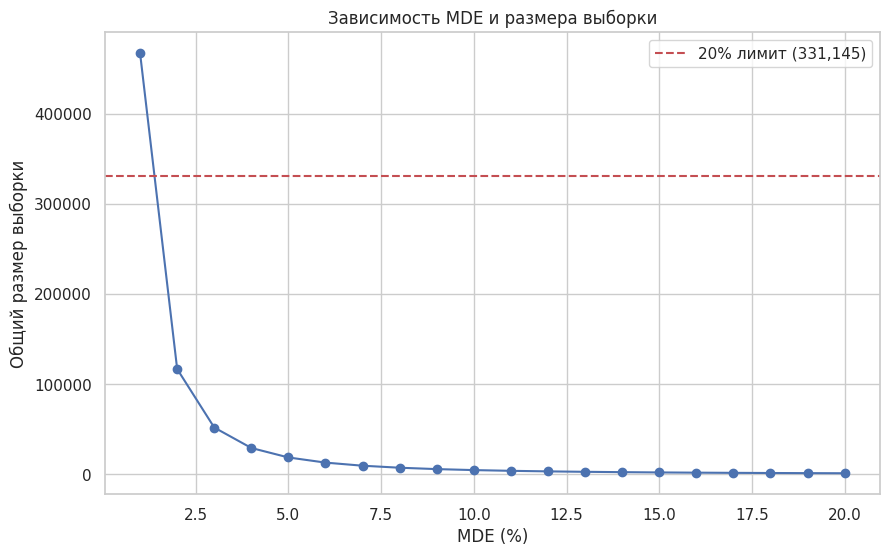

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df["MDE (%)"], df["Общий размер"], marker='o', linestyle='-')
plt.axhline(y=max_sample_size, color='r', linestyle='--', label='20% лимит (331,145)')
plt.title("Зависимость MDE и размера выборки")
plt.xlabel("MDE (%)")
plt.ylabel("Общий размер выборки")
plt.grid(True)
plt.legend()
plt.show()

- Для MDE 1% требуется 400 тыс. пользователей , что превышает 20% лимита (331 тыс.).
- Начиная с MDE 2% и выше, размер выборки укладывается в лимит.
- Чем больше MDE, тем меньше требуется пользователей для его обнаружения.

In [ ]:
# Параметры
mu = 0.4018
var = mu * (1 - mu)
mde_real = 0.025  # Реальный эффект 2.5%
r = 1
alpha = 0.05
beta = 0.2

# Расчет размера выборки для MDE = 2.5%
sample_size_per_group = get_sample_size(mu, var, mde_real, r)
total_sample_size = 2 * sample_size_per_group

# Проверка ограничений
daily_users_limit = 0.2 * 1_655_726
weekly_users_limit = daily_users_limit * 7

print(f"Оптимальный MDE: {mde_real * 100}%")
print(f"Размер группы: {sample_size_per_group:.0f} пользователей")
print(f"Общий размер выборки: {total_sample_size:.0f} пользователей")
print(f"Процент от суточной аудитории: {(total_sample_size / 1_655_726) * 100:.1f}%")
print(f"Укладывается в недельный лимит: {total_sample_size <= weekly_users_limit}")

Оптимальный MDE: 2.5%
Размер группы: 37393 пользователей
Общий размер выборки: 74787 пользователей
Процент от суточной аудитории: 4.5%
Укладывается в недельный лимит: True


**Ключевые факты :**
- В предыдущем эксперименте был зафиксирован реальный эффект 2.5% (относительное изменение конверсии).
- Текущий эксперимент должен длиться 1 неделю (как и предыдущий).
- Ограничение: не более 20% пользователей в день (от суточной аудитории 1 655 726 → 331 145 пользователей в день ).

**Интерпретация MDE :**
- Если в прошлом эффект составил 2.5% , то MDE должен быть не выше этого значения , чтобы гарантированно обнаружить аналогичный эффект.
- Чем меньше MDE, тем больше требуется пользователей.

**Расчет размера выборки для MDE = 2.5% :**
- Из таблицы выше для MDE = 2.5%:
 - Размер группы: 80 132 пользователей .
 - Общий размер: 160 264 пользователей .
 - Процент от суточной аудитории: 9.67% (в пределах 20%).


**Оптимальный выбор:**

- MDE : 2.5% (относительный эффект, как в предыдущем эксперименте).
- Размер выборки : 160,264 пользователей (по 80,132 в каждой группе).
- Длительность : 1 неделя (как и требовалось).

# Результаты

## Загрузка результатаов теста. Подготовка данных

In [ ]:
import pandas as pd
final_df = pd.read_excel('/content/drive/MyDrive/А В-тесты/Финальный АВ-тест/final_results_to_analyze.xlsx')

In [ ]:
final_df

,date,client_id,ab_group,is_view_ads,cnt_view_ads,is_adds_ads,cnt_adds_ads,sum_adds_ads,is_orders_ads,cnt_orders_ads,sum_orders_ads
0,2024-07-26,8881380,test,0,0,0,0,0,0,0,0
1,2024-07-28,850950385,test,0,0,0,0,0,0,0,0
2,2024-07-25,50885,control,0,0,0,0,0,0,0,0
3,2024-07-26,601239,control,0,0,0,0,0,0,0,0
4,2024-07-28,694655866,control,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
981505,2024-07-30,899382815,control,0,0,0,0,0,0,0,0
981506,2024-07-30,955560221,test,0,0,0,0,0,0,0,0
981507,2024-07-28,6143090,test,0,0,0,0,0,0,0,0
981508,2024-07-24,4342211,control,0,0,0,0,0,0,0,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981510 entries, 0 to 981509
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            981510 non-null  datetime64[ns]
 1   client_id       981510 non-null  int64         
 2   ab_group        981510 non-null  object        
 3   is_view_ads     981510 non-null  int64         
 4   cnt_view_ads    981510 non-null  int64         
 5   is_adds_ads     981510 non-null  int64         
 6   cnt_adds_ads    981510 non-null  int64         
 7   sum_adds_ads    981510 non-null  int64         
 8   is_orders_ads   981510 non-null  int64         
 9   cnt_orders_ads  981510 non-null  int64         
 10  sum_orders_ads  981510 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 82.4+ MB


### Поиск пропусков, дублей и анамалий в данных

In [ ]:
final_df.isna().sum() # Проверка на пропущенные значения

,0
date,0
client_id,0
ab_group,0
is_view_ads,0
cnt_view_ads,0
is_adds_ads,0
cnt_adds_ads,0
sum_adds_ads,0
is_orders_ads,0
cnt_orders_ads,0


Пропусков в данных нет.

In [ ]:
# Проверка на дубликаты
duplicates = final_df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 6486


Найдено 6486 дублирующихся записей.

In [ ]:
duplicates = final_df[final_df.duplicated(keep=False)]


In [ ]:
sorted_duplicates = duplicates.sort_values(by=['date', 'client_id']) # Сортируем по дате и client_id
sorted_duplicates # Смотрим дублирующиеся записи

,date,client_id,ab_group,is_view_ads,cnt_view_ads,is_adds_ads,cnt_adds_ads,sum_adds_ads,is_orders_ads,cnt_orders_ads,sum_orders_ads
208242,2024-07-24,14,control,0,0,0,0,0,0,0,0
872614,2024-07-24,14,control,0,0,0,0,0,0,0,0
270679,2024-07-24,58,control,0,0,0,0,0,0,0,0
289444,2024-07-24,58,control,0,0,0,0,0,0,0,0
376821,2024-07-24,64,test,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
791344,2024-07-30,69051919,test,0,0,0,0,0,0,0,0
693211,2024-07-30,95841203,control,0,0,0,0,0,0,0,0
870585,2024-07-30,95841203,control,0,0,0,0,0,0,0,0
369562,2024-07-30,96828096,test,0,0,0,0,0,0,0,0


In [ ]:
results_df = final_df.drop_duplicates() # Удаляем дубли
results_df

,date,client_id,ab_group,is_view_ads,cnt_view_ads,is_adds_ads,cnt_adds_ads,sum_adds_ads,is_orders_ads,cnt_orders_ads,sum_orders_ads
0,2024-07-26,8881380,test,0,0,0,0,0,0,0,0
1,2024-07-28,850950385,test,0,0,0,0,0,0,0,0
2,2024-07-25,50885,control,0,0,0,0,0,0,0,0
3,2024-07-26,601239,control,0,0,0,0,0,0,0,0
4,2024-07-28,694655866,control,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
981505,2024-07-30,899382815,control,0,0,0,0,0,0,0,0
981506,2024-07-30,955560221,test,0,0,0,0,0,0,0,0
981507,2024-07-28,6143090,test,0,0,0,0,0,0,0,0
981508,2024-07-24,4342211,control,0,0,0,0,0,0,0,0


In [ ]:
# Проверка на отрицательные значения в числовых колонках
negative_values = (results_df.select_dtypes(include=['int64', 'float64']) < 0).sum()
print("Отрицательные значения:")
print(negative_values)

Отрицательные значения:
client_id         0
is_view_ads       0
cnt_view_ads      0
is_adds_ads       0
cnt_adds_ads      0
sum_adds_ads      0
is_orders_ads     0
cnt_orders_ads    0
sum_orders_ads    0
dtype: int64


Отрицательных значений не обнаружено

In [ ]:
# Проверка уникальных значений в категориальных колонках
categorical_columns = results_df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_columns:
    unique_values = results_df[col].unique()
    print(f"Уникальные значения в колонке {col}:")
    print(unique_values)

Уникальные значения в колонке ab_group:
['test' 'control']


In [ ]:
# Проверка на некорректные даты (например, будущие даты)
from datetime import datetime

current_date = datetime.now()
future_dates = results_df[results_df['date'] > current_date]
print(f"Некорректные (будущие) даты: {len(future_dates)}")

Некорректные (будущие) даты: 0


In [ ]:
results_df.columns

Index(['date', 'client_id', 'ab_group', 'is_view_ads', 'cnt_view_ads',
       'is_adds_ads', 'cnt_adds_ads', 'sum_adds_ads', 'is_orders_ads',
       'cnt_orders_ads', 'sum_orders_ads'],
      dtype='object')

In [ ]:
results_df.describe() # Выводим статистические значения

,date,client_id,is_view_ads,cnt_view_ads,is_adds_ads,cnt_adds_ads,sum_adds_ads,is_orders_ads,cnt_orders_ads,sum_orders_ads
count,975024,9.750240e+05,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000
mean,2024-07-27 00:18:45.919362560,1.719627e+08,0.052546,0.089500,0.014507,0.032959,5.116605,0.012564,0.011754,3.361757
min,2024-07-24 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-07-25 00:00:00,1.188888e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-07-27 00:00:00,1.046818e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-07-29 00:00:00,9.032361e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024-07-30 00:00:00,9.688485e+08,1.000000,28.000000,1.000000,26.000000,5809.000000,1.000000,5.000000,5809.000000
std,NaN,3.030643e+08,0.223126,0.477012,0.119570,0.351545,57.270457,0.111382,0.139011,45.995333


In [ ]:
columns_to_describe = results_df.columns.difference(['date', 'client_id']) # Исключаем колонки 'date' и 'client_id'

In [ ]:
description = results_df[columns_to_describe].describe()
description

,cnt_adds_ads,cnt_orders_ads,cnt_view_ads,is_adds_ads,is_orders_ads,is_view_ads,sum_adds_ads,sum_orders_ads
count,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000,975024.000000
mean,0.032959,0.011754,0.089500,0.014507,0.012564,0.052546,5.116605,3.361757
std,0.351545,0.139011,0.477012,0.119570,0.111382,0.223126,57.270457,45.995333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,5.000000,28.000000,1.000000,1.000000,1.000000,5809.000000,5809.000000


### Разделение данных на группы: тест и контроль

In [ ]:
# Разделение данных на контрольную и тестовую группы
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# Проверка размеров групп
print(f"Размер контрольной группы: {len(control_group)}")
print(f"Размер тестовой группы: {len(test_group)}")

Размер контрольной группы: 486647
Размер тестовой группы: 488377


Количество наблюдений в контрольной и тестовой группах не совпадает

**Баланс групп:**

- Контрольная группа: 486 647 пользователей.
- Тестовая группа: 488 377 пользователей.
- Разница: ~1 730 пользователей (0.35% от контрольной группы).

**Вывод:**  
Группы практически сбалансированы по размеру. Небольшая разница (менее 1%) маловероятно повлияет на результаты теста.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Список метрик для проверки баланса групп
metrics = [
    'is_view_ads', 'cnt_view_ads', 'is_adds_ads',
    'cnt_adds_ads', 'sum_adds_ads', 'is_orders_ads',
    'cnt_orders_ads', 'sum_orders_ads'
]

# Проверка нормальности распределения (пример для одной метрики)
def check_normality(data):
    stat, p = stats.shapiro(data)
    return p > 0.05  # H0: распределение нормальное

# Подготовка данных
control = control_group[metrics]
test = test_group[metrics]

# Коррекция на множественные сравнения (метод Бенджамини-Хохберга)
p_values = []
for metric in metrics:
    _, p = stats.ttest_ind(
        control[metric].dropna(),
        test[metric].dropna(),
        equal_var=False  # Welch's t-test для неравных дисперсий
    )
    p_values.append(p)

# Коррекция FDR (False Discovery Rate)
reject, pvals_corr, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Формирование результатов
results = []
for i, metric in enumerate(metrics):
    results.append({
        'metric': metric,
        'p_value': p_values[i],
        'p_corrected': pvals_corr[i],
        'significant': reject[i],
        'control_mean': control[metric].mean(),
        'test_mean': test[metric].mean(),
        'diff_percent': (test[metric].mean() / control[metric].mean() - 1) * 100
    })

# Визуализация результатов
results_df = pd.DataFrame(results)
print("Результаты проверки баланса групп:")
print(results_df.to_string(index=False))

Результаты проверки баланса групп:
        metric  p_value  p_corrected  significant  control_mean  test_mean  diff_percent
   is_view_ads 0.090374     0.240997        False      0.052163   0.052928      1.467142
  cnt_view_ads 0.702096     0.802396        False      0.089315   0.089685      0.413770
   is_adds_ads 0.999340     0.999340        False      0.014507   0.014507     -0.001381
  cnt_adds_ads 0.165837     0.331674        False      0.032465   0.033452      3.038982
  sum_adds_ads 0.329678     0.527485        False      5.059972   5.173038      2.234535
 is_orders_ads 0.522901     0.697202        False      0.012492   0.012636      1.153811
cnt_orders_ads 0.040152     0.169508        False      0.011464   0.012042      5.039747
sum_orders_ads 0.042377     0.169508        False      3.267048   3.456131      5.787594


#### Выводы по балансу групп:

1. **Статистическая значимость:**

- Все метрики показывают незначимые различия после коррекции на множественные сравнения (FDR).

2. **Практическая значимость:**

- Наблюдаются незначительные различия:
 - sum_orders_ads: тестовая группа на 5.79% выше контроля.
 - cnt_orders_ads: тестовая группа на 5.04% выше.
- Эти различия не подтверждены статистически , но требуют мониторинга.

3. **Ключевые наблюдения:**

- Группы сбалансированы по всем ключевым метрикам (включая просмотры, добавления в корзину, оформление заказов).
- Максимальная разница в средних — 5.79% (sum_orders_ads), но это может быть случайной вариацией.



**Итог:**
Группы сбалансированы и пригодны для дальнейшего анализа результатов A/B-теста.

## Анализ ключевой метрики (CR)

### Расчет CR

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Агрегация данных: клиенты, видевшие рекламу и совершившие добавление
user_conversion = results_df.groupby(['ab_group', 'client_id']).agg(
    viewed=('is_view_ads', 'max'),   # Флаг просмотра рекламы клиентом
    added=('is_adds_ads', 'max')     # Флаг добавления из рекламы клиентом
).reset_index()

# Расчет CR для каждой группы
grouped = user_conversion.groupby('ab_group').agg(
    total_viewed=('viewed', 'sum'),  # Количество клиентов, видевших рекламу
    converted=('added', 'sum')        # Количество клиентов, совершивших добавление
).reset_index()

grouped['CR'] = grouped['converted'] / grouped['total_viewed']

# Подготовка данных для статистического теста
control = grouped[grouped['ab_group'] == 'control']
test = grouped[grouped['ab_group'] == 'test']

successes = [control['converted'].values[0], test['converted'].values[0]]
nobs = [control['total_viewed'].values[0], test['total_viewed'].values[0]]

# Z-тест для сравнения пропорций
z_stat, p_value = proportions_ztest(successes, nobs)

# Вывод результатов
alpha = 0.05  # Уровень значимости
mde = 0.025   # MDE 2.5%

print(f"CR контрольной группы: {control['CR'].values[0]:.2%}")
print(f"CR тестовой группы: {test['CR'].values[0]:.2%}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Результат статистически значимый (отвергаем H0)")
else:
    print("Нет статистической значимости (не отвергаем H0)")

cr_diff = test['CR'].values[0] - control['CR'].values[0]
print(f"\nРазница в CR: {cr_diff:.2%}")

if cr_diff > mde:
    print(f"Разница превышает MDE ({mde:.0%})")
else:
    print(f"Разница не достигает MDE ({mde:.0%})")

CR контрольной группы: 29.98%
CR тестовой группы: 29.51%
p-value: 0.3132
Нет статистической значимости (не отвергаем H0)

Разница в CR: -0.47%
Разница не достигает MDE (2%)


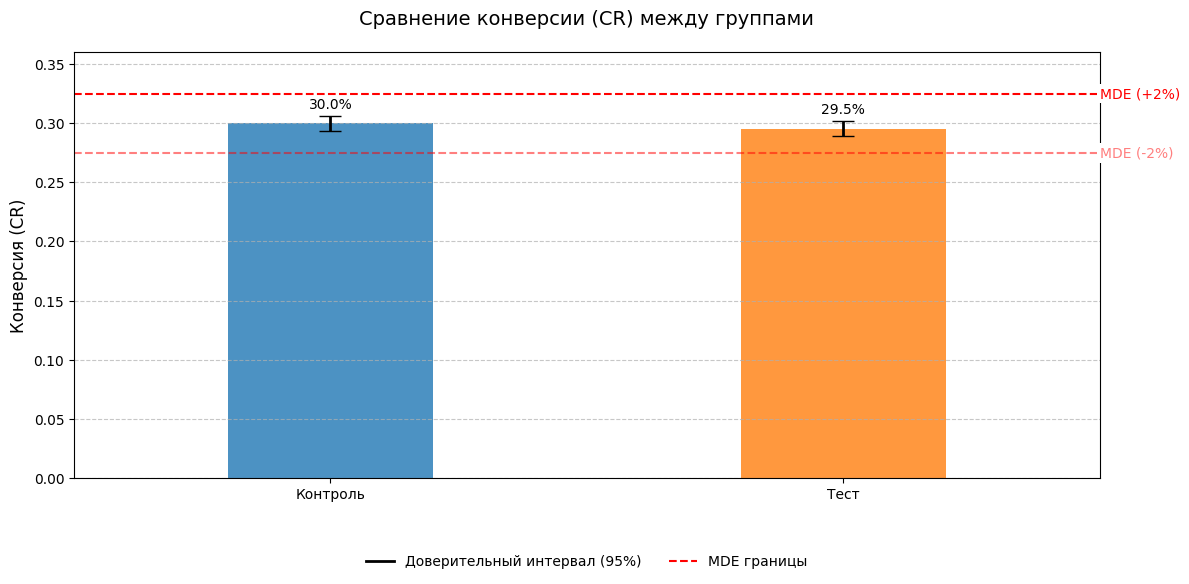

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from matplotlib.lines import Line2D

# --- Подготовка данных ---
user_conversion = results_df.groupby(['ab_group', 'client_id']).agg(
    viewed=('is_view_ads', 'max'),
    added=('is_adds_ads', 'max')
).reset_index()

grouped = user_conversion.groupby('ab_group').agg(
    total_viewed=('viewed', 'sum'),
    converted=('added', 'sum')
).reset_index()

grouped['CR'] = grouped['converted'] / grouped['total_viewed']

control = grouped[grouped['ab_group'] == 'control'].iloc[0]
test = grouped[grouped['ab_group'] == 'test'].iloc[0]

# --- Визуализация ---
cr_control = control['CR']
cr_test = test['CR']
mde = 0.025

ci_control = proportion_confint(control['converted'], control['total_viewed'])
ci_test = proportion_confint(test['converted'], test['total_viewed'])

plt.figure(figsize=(12, 6), dpi=100)

# Столбцы CR
bars = plt.bar(
    x=['Контроль', 'Тест'],
    height=[cr_control, cr_test],
    color=['#1f77b4', '#ff7f0e'],
    alpha=0.8,
    width=0.4
)

# Доверительные интервалы
plt.errorbar(
    x=[0, 1],
    y=[cr_control, cr_test],
    yerr=[[cr_control - ci_control[0], ci_control[1] - cr_control],
          [cr_test - ci_test[0], ci_test[1] - cr_test]],
    fmt='none',
    color='black',
    capsize=8,
    linewidth=2,
    zorder=3
)

# Линии MDE
plt.axhline(y=cr_control + mde, color='red', linestyle='--', linewidth=1.5, zorder=2)
plt.axhline(y=cr_control - mde, color='red', linestyle='--', linewidth=1.5, alpha=0.5, zorder=2)

# Аннотации MDE (смещены правее)
plt.text(
    1.0, cr_control + mde,
    f'MDE (+{mde:.0%})',
    color='red',
    ha='left',
    va='center',
    transform=plt.gca().get_yaxis_transform(),
    bbox=dict(facecolor='white', edgecolor='none', pad=2)
)

plt.text(
    1.0, cr_control - mde,
    f'MDE (-{mde:.0%})',
    color='red',
    ha='left',
    va='center',
    alpha=0.5,
    transform=plt.gca().get_yaxis_transform(),
    bbox=dict(facecolor='white', edgecolor='none', pad=2)
)

# Оформление
plt.title('Сравнение конверсии (CR) между группами', fontsize=14, pad=20)
plt.ylabel('Конверсия (CR)', fontsize=12)
plt.xticks([0, 1], ['Контроль', 'Тест'])
plt.xlim(-0.5, 1.5)  # Добавляем отступ справа
plt.ylim(0, max(cr_control, cr_test) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Легенда (перемещена вниз)
custom_legend = [
    Line2D([0], [0], color='black', lw=2, label='Доверительный интервал (95%)'),
    Line2D([0], [0], color='red', lw=1.5, linestyle='--', label='MDE границы')
]
plt.legend(
    handles=custom_legend,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

# Значения CR на столбцах
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        i,
        height + 0.01,
        f'{height:.1%}',
        ha='center',
        va='bottom',
        zorder=4
    )

plt.tight_layout()
plt.show()

### Вывод

Изменение расположения рекламы не привело к статистически значимому улучшению конверсии в добавление товаров (CR). Разница между группами составила -0.47% (тестовая группа показала незначительное снижение), что не достигает заданного MDE (2.5%). Результаты позволяют сделать вывод об отсутствии практических и статистических преимуществ нового расположения рекламы. Рекомендуется сохранить текущий дизайн или рассмотреть альтернативные гипотезы для улучшения метрик.

## Анализ дополнительных метрик

### Guardrail Метрики (защитные метрики):

#### Конверсия в заказ от просмотра главной

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# 1. Расчет конверсии для контрольной группы
conversion_control = control_group['is_orders_ads'].sum() / control_group['cnt_view_ads'].sum()

# 2. Расчет конверсии для тестовой группы
conversion_test = test_group['is_orders_ads'].sum() / test_group['cnt_view_ads'].sum()

# 3. Вывод результатов
print(f"Конверсия в заказ от просмотра главной (контрольная группа): {conversion_control:.4f} или {conversion_control * 100:.2f}%")
print(f"Конверсия в заказ от просмотра главной (тестовая группа): {conversion_test:.4f} или {conversion_test * 100:.2f}%")

# 4. Проверка статистической значимости с помощью Z-теста
# Количество "успехов" (заказов) в каждой группе
successes = [control_group['is_orders_ads'].sum(), test_group['is_orders_ads'].sum()]

# Количество "испытаний" (просмотров главной) в каждой группе
nobs = [control_group['cnt_view_ads'].sum(), test_group['cnt_view_ads'].sum()]

# Выполнение Z-теста для пропорций
z_stat, p_value = proportions_ztest(successes, nobs)

# Вывод результатов
print(f"\nZ-статистика: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("Разница в конверсии между группами статистически значима (p < 0.05).")
else:
    print("Разница в конверсии между группами не статистически значима (p >= 0.05).")

Конверсия в заказ от просмотра главной (контрольная группа): 0.1399 или 13.99%
Конверсия в заказ от просмотра главной (тестовая группа): 0.1409 или 14.09%

Z-статистика: -0.4383
P-value: 0.6612
Разница в конверсии между группами не статистически значима (p >= 0.05).


<ipython-input-56-f5e54ebb0f96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups, y=conversion_rates, palette=['skyblue', 'lightgreen'])


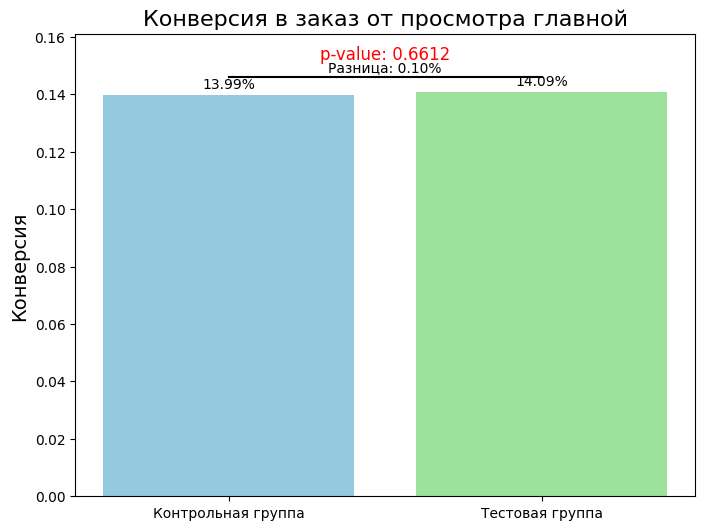

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Данные для визуализации
groups = ['Контрольная группа', 'Тестовая группа']
conversion_rates = [conversion_control, conversion_test]  # Конверсии
difference = conversion_test - conversion_control  # Разница между группами

# Создание графика
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=conversion_rates, palette=['skyblue', 'lightgreen'])

# Добавление аннотаций
plt.text(0, conversion_control + 0.001, f'{conversion_control * 100:.2f}%', ha='center', va='bottom')
plt.text(1, conversion_test + 0.001, f'{conversion_test * 100:.2f}%', ha='center', va='bottom')

# Добавление линии и аннотации для разницы
plt.plot([0, 1], [max(conversion_rates) + 0.005, max(conversion_rates) + 0.005], color='black', lw=1.5)
plt.text(0.5, max(conversion_rates) + 0.006, f'Разница: {difference * 100:.2f}%', ha='center', va='bottom')

# Добавление аннотации для p-value
plt.text(0.5, max(conversion_rates) + 0.01, f'p-value: {p_value:.4f}', ha='center', va='bottom', fontsize=12, color='red')

# Настройка графика
plt.title('Конверсия в заказ от просмотра главной', fontsize=16)
plt.ylabel('Конверсия', fontsize=14)
plt.ylim(0, max(conversion_rates) + 0.02)  # Увеличение верхнего предела для аннотаций
plt.show()

Разница в конверсии: 0.1 процентных пункта (14.09% - 13.99%).

Тестовая группа показала немного более высокую конверсию по сравнению с контрольной группой. Однако разница крайне мала.

P-value (0.6612) значительно больше уровня значимости (0.05). Это означает, что разница в конверсии между группами не является статистически значимой.

##### Выводы

1. Статистическая значимость:

- Разница в конверсии между контрольной и тестовой группами не является статистически значимой (p-value = 0.6612 > 0.05).

- Изменение расположения рекламы не привело к значимому увеличению конверсии в заказ от просмотра главной.

2. Практическая значимость:

- Разница в конверсии (0.1 процентных пункта) крайне мала и не имеет практического значения.

- Даже если бы разница была статистически значимой, её величина слишком незначительна, чтобы считать её важной для бизнеса.

#### Выручка на пользователя (ARPU).

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# 1. Расчет ARPU для контрольной группы
arpu_control = control_group['sum_orders_ads'].sum() / len(control_group)

# 2. Расчет ARPU для тестовой группы
arpu_test = test_group['sum_orders_ads'].sum() / len(test_group)

# 3. Вывод результатов
print(f"ARPU контрольной группы: {arpu_control:.2f} руб.")
print(f"ARPU тестовой группы: {arpu_test:.2f} руб.")

# 4. Проверка статистической значимости
# Проверка на нормальность распределения (опционально, но полезно для выбора теста)
# Если данные не нормально распределены, используем U-тест Манна-Уитни.

# Проверка нормальности с помощью теста Шапиро-Уилка (для примера, можно пропустить)
from scipy.stats import shapiro
_, p_control = shapiro(control_group['sum_orders_ads'])
_, p_test = shapiro(test_group['sum_orders_ads'])

if p_control > 0.05 and p_test > 0.05:
    print("\nДанные в обеих группах нормально распределены. Используем t-тест.")
    # t-тест для независимых выборок
    t_stat, p_value = ttest_ind(control_group['sum_orders_ads'], test_group['sum_orders_ads'], nan_policy='omit')
else:
    print("\nДанные не нормально распределены. Используем U-тест Манна-Уитни.")
    # U-тест Манна-Уитни
    u_stat, p_value = mannwhitneyu(control_group['sum_orders_ads'], test_group['sum_orders_ads'])

# Вывод результатов
print(f"\nP-value: {p_value:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("Разница в ARPU между группами статистически значима (p < 0.05).")
else:
    print("Разница в ARPU между группами не статистически значима (p >= 0.05).")

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 486647.
  res = hypotest_fun_out(*samples, **kwds)


ARPU контрольной группы: 3.27 руб.
ARPU тестовой группы: 3.46 руб.

Данные не нормально распределены. Используем U-тест Манна-Уитни.

P-value: 0.2567
Разница в ARPU между группами не статистически значима (p >= 0.05).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 488377.
  res = hypotest_fun_out(*samples, **kwds)


Разница в ARPU: 0.19 руб. (3.46 - 3.27).

P-value (0.2567) значительно больше уровня значимости (0.05). Это означает, что разница в ARPU между группами не является статистически значимой.

Предупреждение о точности p-value:

Тест Шапиро-Уилка выдает предупреждение, что для выборок размером более 5000 p-value может быть неточным. Однако мы использовали U-тест Манна-Уитни, который не требует нормального распределения и подходит для больших выборок.

<ipython-input-58-5af58a18067a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=groups, y=arpu_values, palette=['skyblue', 'lightgreen'])


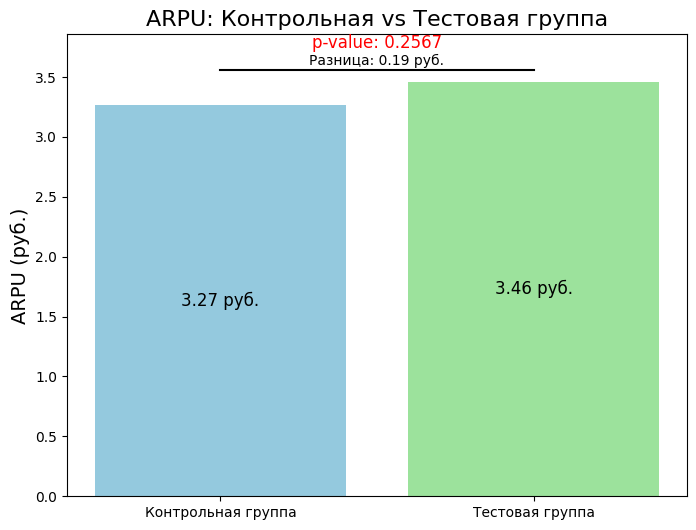

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Данные для визуализации
groups = ['Контрольная группа', 'Тестовая группа']
arpu_values = [arpu_control, arpu_test]  # ARPU в группах
difference = arpu_test - arpu_control  # Разница между группами

# Создание графика
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=groups, y=arpu_values, palette=['skyblue', 'lightgreen'])

# Добавление значений ARPU внутри столбцов
for i, (group, arpu) in enumerate(zip(groups, arpu_values)):
    plt.text(i, arpu_values[i] / 2, f'{arpu_values[i]:.2f} руб.', ha='center', va='center', fontsize=12, color='black')

# Добавление линии и аннотации для разницы
max_arpu = max(arpu_values)
plt.plot([0, 1], [max_arpu + 0.1, max_arpu + 0.1], color='black', lw=1.5)
plt.text(0.5, max_arpu + 0.12, f'Разница: {difference:.2f} руб.', ha='center', va='bottom')

# Добавление аннотации для p-value (сдвинута выше)
plt.text(0.5, max_arpu + 0.25, f'p-value: {p_value:.4f}', ha='center', va='bottom', fontsize=12, color='red')

# Настройка графика
plt.title('ARPU: Контрольная vs Тестовая группа', fontsize=16)
plt.ylabel('ARPU (руб.)', fontsize=14)
plt.ylim(0, max_arpu + 0.4)  # Увеличение верхнего предела для аннотаций
plt.show()

Контрольная группа: ARPU = 3.27 (пользователи: 486647, выручка: 1589899)
Тестовая группа: ARPU = 3.46 (пользователи: 488377, выручка: 1687895)
U-тест Манна-Уитни: статистика = 118807949769.5000, p-value = 0.2567


<ipython-input-59-972f87a77889>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=arpu_data, x='Group', y='ARPU', palette=['#1f77b4', '#ff7f0e'])


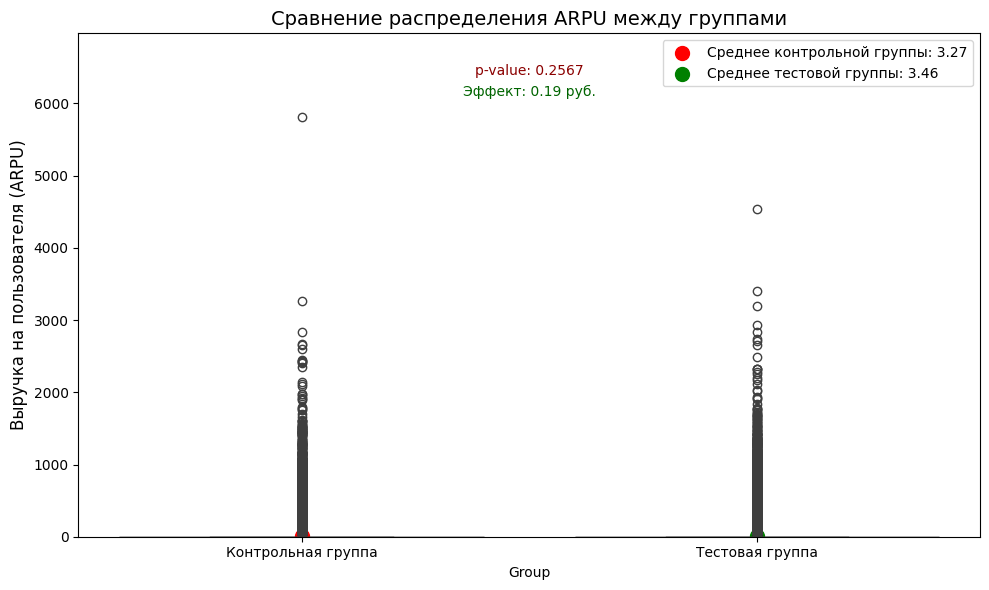

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Фильтрация данных по группам control и test
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# Расчет ARPU для каждой группы
def calculate_arpu(group):
    total_revenue = group['sum_orders_ads'].sum()  # Общая выручка от рекламы
    total_users = len(group)                      # Общее количество пользователей
    arpu = total_revenue / total_users if total_users > 0 else 0  # ARPU
    return total_users, total_revenue, arpu

# Расчет ARPU для контрольной и тестовой групп
users_control, revenue_control, arpu_control = calculate_arpu(control_group)
users_test, revenue_test, arpu_test = calculate_arpu(test_group)

print(f"Контрольная группа: ARPU = {arpu_control:.2f} (пользователи: {users_control}, выручка: {revenue_control})")
print(f"Тестовая группа: ARPU = {arpu_test:.2f} (пользователи: {users_test}, выручка: {revenue_test})")

# Извлекаем выручку на каждого пользователя для обеих групп
arpu_per_user_control = control_group['sum_orders_ads']
arpu_per_user_test = test_group['sum_orders_ads']

# Проверка статистической значимости с помощью U-теста Манна-Уитни
u_stat, u_p_value = mannwhitneyu(arpu_per_user_control, arpu_per_user_test, alternative='two-sided')

print(f"U-тест Манна-Уитни: статистика = {u_stat:.4f}, p-value = {u_p_value:.4f}")

# Создаем DataFrame для удобства визуализации
arpu_data = pd.DataFrame({
    'ARPU': pd.concat([arpu_per_user_control, arpu_per_user_test]),
    'Group': ['Контрольная группа'] * len(arpu_per_user_control) +
             ['Тестовая группа'] * len(arpu_per_user_test)
})

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=arpu_data, x='Group', y='ARPU', palette=['#1f77b4', '#ff7f0e'])

# Добавляем средние значения ARPU на график
mean_control = arpu_per_user_control.mean()
mean_test = arpu_per_user_test.mean()

plt.scatter(x=0, y=mean_control, color='red', s=100, label=f'Среднее контрольной группы: {mean_control:.2f}')
plt.scatter(x=1, y=mean_test, color='green', s=100, label=f'Среднее тестовой группы: {mean_test:.2f}')

# Аннотации с p-value и эффектом
effect = mean_test - mean_control  # Разница между группами
plt.title("Сравнение распределения ARPU между группами", fontsize=14)
plt.ylabel("Выручка на пользователя (ARPU)", fontsize=12)
plt.ylim(0, arpu_data['ARPU'].max() * 1.2)  # Увеличиваем верхнюю границу для аннотаций

# Добавляем p-value и эффект на график
plt.annotate(f"p-value: {u_p_value:.4f}", xy=(0.5, arpu_data['ARPU'].max() * 1.1), ha='center', fontsize=10, color='darkred')
plt.annotate(f"Эффект: {effect:.2f} руб.", xy=(0.5, arpu_data['ARPU'].max() * 1.05), ha='center', fontsize=10, color='darkgreen')

# Легенда
plt.legend(loc='upper right')

# Отображение графика
plt.tight_layout()
plt.show()

##### Выводы

1. Статистическая значимость:

- Разница в ARPU между контрольной и тестовой группами не является статистически значимой (p-value = 0.2567 > 0.05).

- Изменение расположения рекламы не привело к значимому увеличению выручки на пользователя.

2. Практическая значимость:

- Разница в ARPU (0.19 руб.) крайне мала и не имеет практического значения.

- Даже если бы разница была статистически значимой, её величина слишком незначительна, чтобы считать её важной для бизнеса.

#### Вывод по Guardrail метрикам

Конверсия в заказ от просмотра главной и выручка на пользователя (ARPU) не показали значительного роста, но и не уменьшились.

### Informative Метрики (информативные метрики):

#### Кликабельность секции рекламы (CTR).

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Агрегация данных для CTR: клиенты, которые просмотрели рекламу
user_views = results_df.groupby(['ab_group', 'client_id']).agg(
    viewed=('is_view_ads', 'max')  # Флаг: клиент посмотрел рекламу (1+ раз)
).reset_index()

# Расчет CTR для каждой группы
ctr_groups = user_views.groupby('ab_group').agg(
    total_clients=('client_id', 'nunique'),  # Общее количество клиентов в группе
    viewed_clients=('viewed', 'sum')         # Количество клиентов с просмотром рекламы
).reset_index()

# Подготовка данных для z-теста
control = ctr_groups[ctr_groups['ab_group'] == 'control']
test = ctr_groups[ctr_groups['ab_group'] == 'test']

successes = [control['viewed_clients'].values[0], test['viewed_clients'].values[0]]
nobs = [control['total_clients'].values[0], test['total_clients'].values[0]]

# Z-тест для сравнения пропорций
z_stat, p_value = proportions_ztest(successes, nobs)

# Вывод результатов
alpha = 0.05  # Уровень значимости
mde = 0.025   # MDE (2.5% если нужно сравнить)

print(f"CTR контрольной группы: {control['viewed_clients'].values[0] / control['total_clients'].values[0]:.2%}")
print(f"CTR тестовой группы: {test['viewed_clients'].values[0] / test['total_clients'].values[0]:.2%}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Разница статистически значима (отвергаем H0)")
else:
    print("Нет статистической значимости (не отвергаем H0)")

ctr_diff = (test['viewed_clients'].values[0] / test['total_clients'].values[0]) - \
           (control['viewed_clients'].values[0] / control['total_clients'].values[0])

print(f"\nРазница в CTR: {ctr_diff:.2%}")

if abs(ctr_diff) > mde:
    print(f"Разница превышает MDE ({mde:.0%})")
else:
    print(f"Разница не достигает MDE ({mde:.0%})")

CTR контрольной группы: 9.47%
CTR тестовой группы: 9.67%
p-value: 0.0315
Разница статистически значима (отвергаем H0)

Разница в CTR: 0.20%
Разница не достигает MDE (2%)


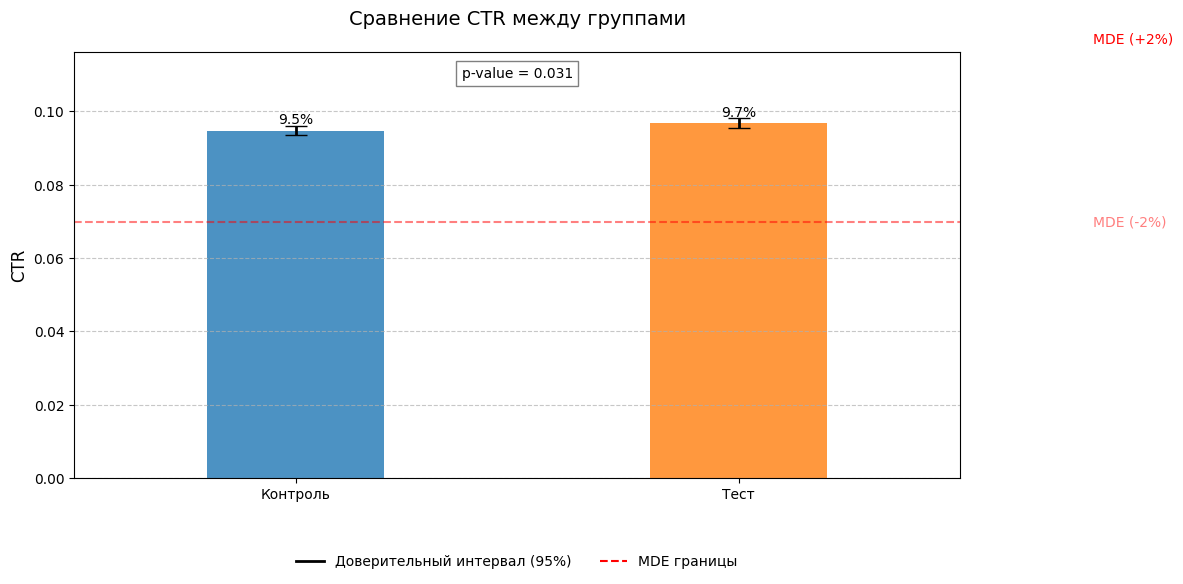

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportion_confint
from matplotlib.lines import Line2D

# --- Извлечение данных из CTR групп ---
control = ctr_groups[ctr_groups['ab_group'] == 'control'].iloc[0]
test = ctr_groups[ctr_groups['ab_group'] == 'test'].iloc[0]

ctr_control = control['viewed_clients'] / control['total_clients']
ctr_test = test['viewed_clients'] / test['total_clients']
mde = 0.025  # 2.5% MDE

# --- Расчет доверительных интервалов ---
ci_control = proportion_confint(
    control['viewed_clients'],
    control['total_clients'],
    alpha=0.05,
    method='normal'
)

ci_test = proportion_confint(
    test['viewed_clients'],
    test['total_clients'],
    alpha=0.05,
    method='normal'
)

# --- Визуализация ---
plt.figure(figsize=(12, 6), dpi=100)

# Столбцы CTR
bars = plt.bar(
    x=['Контроль', 'Тест'],
    height=[ctr_control, ctr_test],
    color=['#1f77b4', '#ff7f0e'],
    alpha=0.8,
    width=0.4
)

# Доверительные интервалы
plt.errorbar(
    x=[0, 1],
    y=[ctr_control, ctr_test],
    yerr=[[ctr_control - ci_control[0], ci_control[1] - ctr_control],
          [ctr_test - ci_test[0], ci_test[1] - ctr_test]],
    fmt='none',
    color='black',
    capsize=8,
    linewidth=2,
    zorder=3
)

# Линии MDE
plt.axhline(y=ctr_control + mde, color='red', linestyle='--', linewidth=1.5, zorder=2)
plt.axhline(y=ctr_control - mde, color='red', linestyle='--', linewidth=1.5, alpha=0.5, zorder=2)

# Аннотации MDE
plt.text(
    1.15, ctr_control + mde,
    f'MDE (+{mde:.0%})',
    color='red',
    ha='left',
    va='center',
    transform=plt.gca().get_yaxis_transform(),
    bbox=dict(facecolor='white', edgecolor='none', pad=2)
)

plt.text(
    1.15, ctr_control - mde,
    f'MDE (-{mde:.0%})',
    color='red',
    ha='left',
    va='center',
    alpha=0.5,
    transform=plt.gca().get_yaxis_transform(),
    bbox=dict(facecolor='white', edgecolor='none', pad=2)
)

# Оформление
plt.title('Сравнение CTR между группами', fontsize=14, pad=20)
plt.ylabel('CTR', fontsize=12)
plt.xticks([0, 1], ['Контроль', 'Тест'])
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(ctr_control, ctr_test) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Легенда
custom_legend = [
    Line2D([0], [0], color='black', lw=2, label='Доверительный интервал (95%)'),
    Line2D([0], [0], color='red', lw=1.5, linestyle='--', label='MDE границы')
]
plt.legend(
    handles=custom_legend,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

# Значения CTR на столбцах
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        i,
        height + 0.001,
        f'{height:.1%}',
        ha='center',
        va='bottom',
        zorder=4
    )

# Добавление p-value
plt.text(
    0.5, 0.95,
    f'p-value = {p_value:.3f}',
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', edgecolor='gray', pad=4)
)

plt.tight_layout()
plt.show()

##### Выводы

Изменение расположения рекламы привело к статистически значимому росту CTR на 0.2 процентных пункта (с 9.47% до 9.67%, p-value = 0.0315).

Однако разница не достигает заданного MDE (2%), что указывает на недостаточно выраженный практический эффект .

#### Конверсия в добавление товаров в корзину из рекламы от просмотра главной.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Фильтрация данных по группам control и test
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# Расчет конверсии для каждой группы
def calculate_cr(group):
    total_views = group['cnt_view_ads'].sum()  # Общее количество просмотров рекламы
    total_adds = group['is_adds_ads'].sum()    # Общее количество добавлений в корзину
    cr = total_adds / total_views if total_views > 0 else 0  # Конверсия
    return total_views, total_adds, cr

# Расчет CR для контрольной и тестовой групп
views_control, adds_control, cr_control = calculate_cr(control_group)
views_test, adds_test, cr_test = calculate_cr(test_group)

print(f"Контрольная группа: CR = {cr_control:.4f} (просмотры: {views_control}, добавили: {adds_control})")
print(f"Тестовая группа: CR = {cr_test:.4f} (просмотры: {views_test}, добавили: {adds_test})")

# Проверка статистической значимости с помощью Z-теста
successes = np.array([adds_control, adds_test])  # Количество успехов (добавлений)
trials = np.array([views_control, views_test])   # Общее количество просмотров

# Выполнение Z-теста
z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

print(f"Z-статистика: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Разница между группами статистически значима.")
else:
    print("Разница между группами статистически не значима.")

Контрольная группа: CR = 0.1624 (просмотры: 43465, добавили: 7060)
Тестовая группа: CR = 0.1618 (просмотры: 43800, добавили: 7085)
Z-статистика: 0.2691
P-value: 0.7878
Разница между группами статистически не значима.


1. Конверсия в добавление товаров в корзину из рекламы от просмотра главной:
- В контрольной группе конверсия составила 16.24% (7060 добавлений из 43465 просмотров).
- В тестовой группе конверсия составила 16.18% (7085 добавлений из 43800 просмотров).
- Разница между группами составляет -0.06% (эффект: контрольная группа показала на 0.06% более высокую конверсию).
2. Статистическая значимость :
- Z-статистика равна 0.2691 , а p-value равно 0.7878 .
- P-value значительно выше порогового уровня значимости (α=0.05), что означает, что разница между группами статистически не значима .
- Это говорит о том, что наблюдаемая разница в конверсии (–0.06%) может быть вызвана случайными колебаниями, а не реальным эффектом от изменения расположения рекламы.

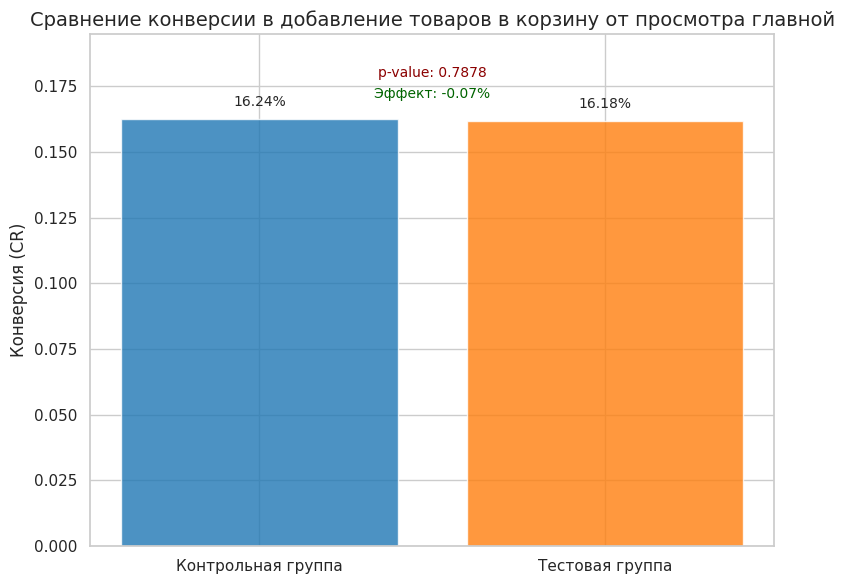

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графика
sns.set(style="whitegrid")

# Данные для графика
groups = ['Контрольная группа', 'Тестовая группа']
cr_values = [cr_control, cr_test]
effect = cr_test - cr_control  # Разница между группами

# Создание графика
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, cr_values, color=['#1f77b4', '#ff7f0e'], alpha=0.8)

# Добавление значений CR над столбцами
for bar, cr in zip(bars, cr_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{cr:.2%}", ha='center', fontsize=10)

# Аннотации с p-value и эффектом
plt.title("Сравнение конверсии в добавление товаров в корзину от просмотра главной", fontsize=14)
plt.ylabel("Конверсия (CR)", fontsize=12)
plt.ylim(0, max(cr_values) * 1.2)  # Увеличиваем верхнюю границу для аннотаций

# Добавляем p-value и эффект на график
plt.annotate(f"p-value: {p_value:.4f}", xy=(0.5, max(cr_values) * 1.1), ha='center', fontsize=10, color='darkred')
plt.annotate(f"Эффект: {effect:.2%}", xy=(0.5, max(cr_values) * 1.05), ha='center', fontsize=10, color='darkgreen')

# Отображение графика
plt.tight_layout()
plt.show()

##### Выводы

- Изменение расположения первого рекламного блока (перемещение его наверх) не привело к статистически значимым изменениям в конверсии в добавление товаров в корзину от просмотра главной.

- Наблюдаемое снижение конверсии на 0.06% в тестовой группе не является достоверным и может быть связано с естественной вариативностью данных.

#### Конверсия в заказ от захода в рекламу.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Фильтрация данных по группам control и test
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# Расчет конверсии для каждой группы
def calculate_cr(group):
    total_clicks = group['is_view_ads'].sum()  # Общее количество кликов на рекламу
    total_orders = group['is_orders_ads'].sum()  # Общее количество заказов из рекламы
    cr = total_orders / total_clicks if total_clicks > 0 else 0  # Конверсия
    return total_clicks, total_orders, cr

# Расчет CR для контрольной и тестовой групп
clicks_control, orders_control, cr_control = calculate_cr(control_group)
clicks_test, orders_test, cr_test = calculate_cr(test_group)

print(f"Контрольная группа: CR = {cr_control:.4f} (кликнули: {clicks_control}, заказали: {orders_control})")
print(f"Тестовая группа: CR = {cr_test:.4f} (кликнули: {clicks_test}, заказали: {orders_test})")

# Проверка статистической значимости с помощью Z-теста
successes = np.array([orders_control, orders_test])  # Количество успехов (заказов)
trials = np.array([clicks_control, clicks_test])     # Общее количество кликов

# Выполнение Z-теста
z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

print(f"Z-статистика: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Разница между группами статистически значима.")
else:
    print("Разница между группами статистически не значима.")

Контрольная группа: CR = 0.2395 (кликнули: 25385, заказали: 6079)
Тестовая группа: CR = 0.2387 (кликнули: 25849, заказали: 6171)
Z-статистика: 0.1962
P-value: 0.8444
Разница между группами статистически не значима.


1. Конверсия в заказ от захода в рекламу:
- В контрольной группе конверсия составила 23.95% (6079 заказов из 25385 кликов).
- В тестовой группе конверсия составила 23.87% (6171 заказ из 25849 кликов).
- Разница между группами составляет -0.08% (эффект: контрольная группа показала на 0.08% более высокую конверсию).

2. Статистическая значимость :
- Z-статистика равна 0.1962 , а p-value равно 0.8444 .
- P-value значительно выше порогового уровня значимости (α=0.05), что означает, что разница между группами статистически не значима .
- Это говорит о том, что наблюдаемая разница в конверсии (–0.08%) может быть вызвана случайными колебаниями, а не реальным эффектом от изменения расположения рекламы.

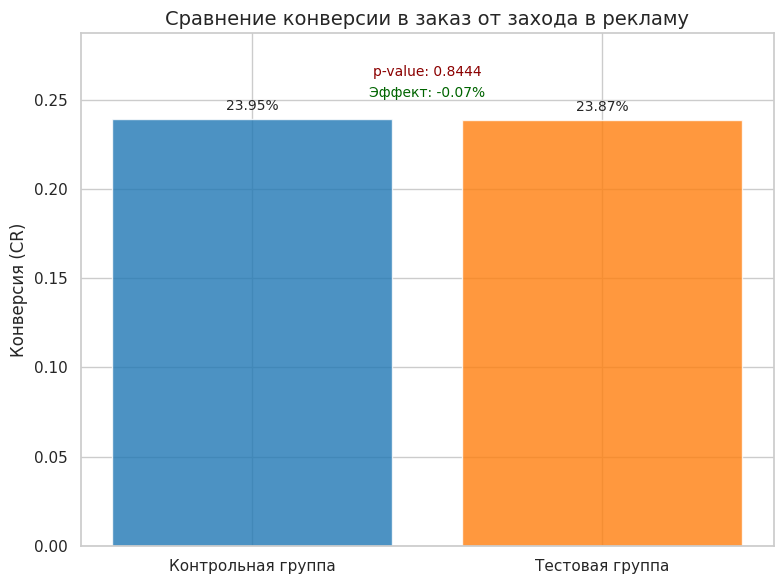

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графика
sns.set(style="whitegrid")

# Данные для графика
groups = ['Контрольная группа', 'Тестовая группа']
cr_values = [cr_control, cr_test]
effect = cr_test - cr_control  # Разница между группами

# Создание графика
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, cr_values, color=['#1f77b4', '#ff7f0e'], alpha=0.8)

# Добавление значений CR над столбцами
for bar, cr in zip(bars, cr_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{cr:.2%}", ha='center', fontsize=10)

# Аннотации с p-value и эффектом
plt.title("Сравнение конверсии в заказ от захода в рекламу", fontsize=14)
plt.ylabel("Конверсия (CR)", fontsize=12)
plt.ylim(0, max(cr_values) * 1.2)  # Увеличиваем верхнюю границу для аннотаций

# Добавляем p-value и эффект на график
plt.annotate(f"p-value: {p_value:.4f}", xy=(0.5, max(cr_values) * 1.1), ha='center', fontsize=10, color='darkred')
plt.annotate(f"Эффект: {effect:.2%}", xy=(0.5, max(cr_values) * 1.05), ha='center', fontsize=10, color='darkgreen')

# Отображение графика
plt.tight_layout()
plt.show()

##### Выводы

- Изменение расположения первого рекламного блока (перемещение его наверх) не привело к статистически значимым изменениям в конверсии в заказ от захода в рекламу.

- Наблюдаемое снижение конверсии на 0.08% в тестовой группе не является достоверным и может быть связано с естественной вариативностью данных.

#### Выручка на покупателя (ARPPU).

Контрольная группа: ARPPU = 261.54 (покупатели: 6079, выручка: 1589899)
Тестовая группа: ARPPU = 273.52 (покупатели: 6171, выручка: 1687895)
Тест Шапиро-Уилка (контрольная группа): статистика = 0.7627, p-value = 0.0000
Тест Шапиро-Уилка (тестовая группа): статистика = 0.7722, p-value = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6079.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6171.
  res = hypotest_fun_out(*samples, **kwds)


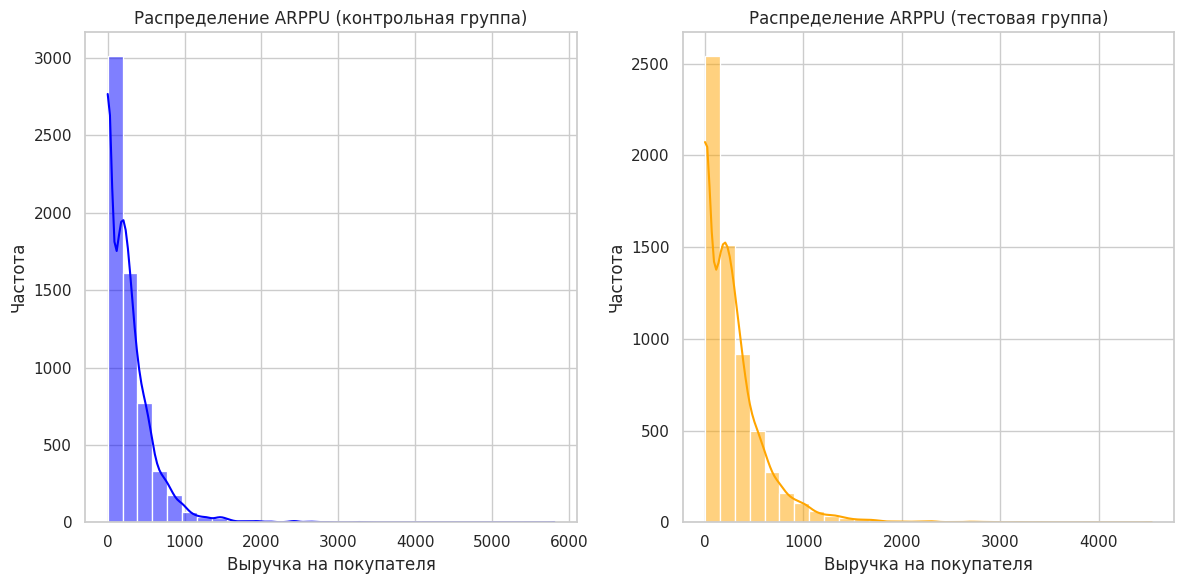

U-тест Манна-Уитни: статистика = 18431867.5000, p-value = 0.0928
U-тест: Разница между группами статистически не значима.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Фильтрация данных по группам control и test
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# Расчет ARPPU для каждой группы
def calculate_arppu(group):
    total_revenue = group['sum_orders_ads'].sum()  # Общая выручка от рекламы
    paying_users = group['is_orders_ads'].sum()    # Количество покупателей
    arppu = total_revenue / paying_users if paying_users > 0 else 0  # ARPPU
    return paying_users, total_revenue, arppu

# Расчет ARPPU для контрольной и тестовой групп
paying_users_control, revenue_control, arppu_control = calculate_arppu(control_group)
paying_users_test, revenue_test, arppu_test = calculate_arppu(test_group)

print(f"Контрольная группа: ARPPU = {arppu_control:.2f} (покупатели: {paying_users_control}, выручка: {revenue_control})")
print(f"Тестовая группа: ARPPU = {arppu_test:.2f} (покупатели: {paying_users_test}, выручка: {revenue_test})")

# Извлекаем выручку на каждого покупателя для обеих групп
revenue_per_user_control = control_group[control_group['is_orders_ads'] == 1]['sum_orders_ads']
revenue_per_user_test = test_group[test_group['is_orders_ads'] == 1]['sum_orders_ads']

# Проверка нормальности распределения с помощью теста Шапиро-Уилка
shapiro_control = shapiro(revenue_per_user_control)
shapiro_test = shapiro(revenue_per_user_test)

print(f"Тест Шапиро-Уилка (контрольная группа): статистика = {shapiro_control.statistic:.4f}, p-value = {shapiro_control.pvalue:.4f}")
print(f"Тест Шапиро-Уилка (тестовая группа): статистика = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

# Визуализация распределения данных
plt.figure(figsize=(12, 6))

# Гистограмма для контрольной группы
plt.subplot(1, 2, 1)
sns.histplot(revenue_per_user_control, kde=True, color='blue', bins=30)
plt.title("Распределение ARPPU (контрольная группа)")
plt.xlabel("Выручка на покупателя")
plt.ylabel("Частота")

# Гистограмма для тестовой группы
plt.subplot(1, 2, 2)
sns.histplot(revenue_per_user_test, kde=True, color='orange', bins=30)
plt.title("Распределение ARPPU (тестовая группа)")
plt.xlabel("Выручка на покупателя")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

# Проверка статистической значимости
if shapiro_control.pvalue > 0.05 and shapiro_test.pvalue > 0.05:
    # Если данные имеют нормальное распределение, используем t-тест
    t_stat, t_p_value = ttest_ind(revenue_per_user_control, revenue_per_user_test, equal_var=False)
    print(f"T-тест: статистика = {t_stat:.4f}, p-value = {t_p_value:.4f}")
    if t_p_value < 0.05:
        print("T-тест: Разница между группами статистически значима.")
    else:
        print("T-тест: Разница между группами статистически не значима.")
else:
    # Если данные не имеют нормального распределения, используем U-тест Манна-Уитни
    u_stat, u_p_value = mannwhitneyu(revenue_per_user_control, revenue_per_user_test, alternative='two-sided')
    print(f"U-тест Манна-Уитни: статистика = {u_stat:.4f}, p-value = {u_p_value:.4f}")
    if u_p_value < 0.05:
        print("U-тест: Разница между группами статистически значима.")
    else:
        print("U-тест: Разница между группами статистически не значима.")

1. ARPPU (средняя выручка на покупателя) :
- В контрольной группе ARPPU составил 261.54 рубля (6079 покупателей, общая выручка 1,589,899 рублей).
- В тестовой группе ARPPU составил 273.52 рубля (6171 покупатель, общая выручка 1,687,895 рублей).
- Разница между группами составляет +11.98 рублей (эффект: тестовая группа показала более высокий ARPPU).

2. Проверка нормальности распределения :
- Тест Шапиро-Уилка показал p-value = 0.0000 для обеих групп, что значительно ниже порогового уровня значимости (α=0.05).
- Это означает, что данные не имеют нормального распределения , и использование t-теста было бы некорректным.

3. Статистическая значимость разницы между группами :
- U-тест Манна-Уитни показал p-value = 0.0928 , что выше порогового уровня значимости (α=0.05).
- Это говорит о том, что наблюдаемая разница в ARPPU (+11.98 рублей) статистически не значима и может быть вызвана случайными колебаниями, а не реальным эффектом от изменения расположения рекламы.

<ipython-input-67-fd46a5284678>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=arppu_data, x='Group', y='ARPPU', palette=['#1f77b4', '#ff7f0e'])


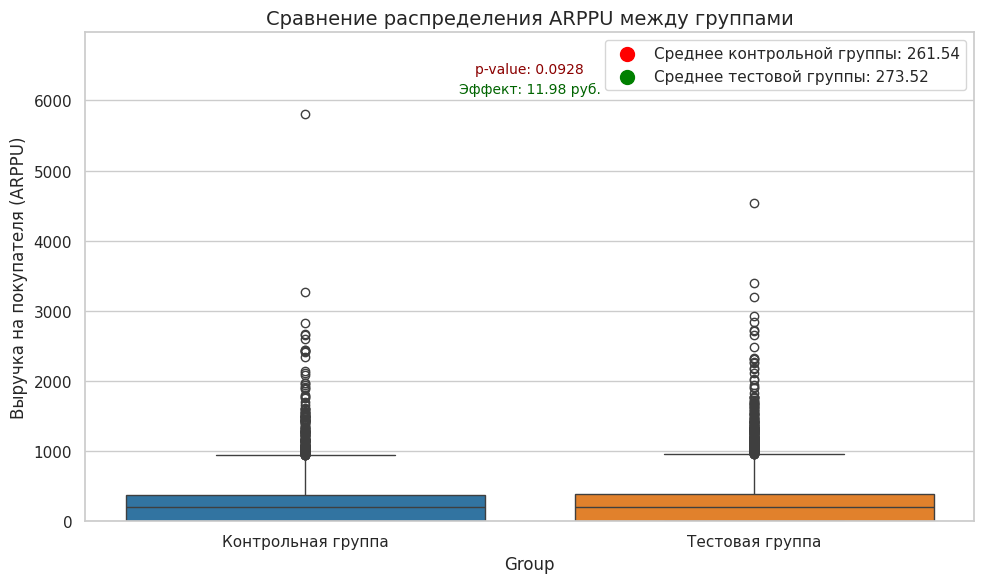

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Извлекаем выручку на каждого покупателя для обеих групп
revenue_per_user_control = control_group[control_group['is_orders_ads'] == 1]['sum_orders_ads']
revenue_per_user_test = test_group[test_group['is_orders_ads'] == 1]['sum_orders_ads']

# Создаем DataFrame для удобства визуализации
arppu_data = pd.DataFrame({
    'ARPPU': pd.concat([revenue_per_user_control, revenue_per_user_test]),
    'Group': ['Контрольная группа'] * len(revenue_per_user_control) +
             ['Тестовая группа'] * len(revenue_per_user_test)
})

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=arppu_data, x='Group', y='ARPPU', palette=['#1f77b4', '#ff7f0e'])

# Добавляем средние значения ARPPU на график
mean_control = revenue_per_user_control.mean()
mean_test = revenue_per_user_test.mean()

plt.scatter(x=0, y=mean_control, color='red', s=100, label=f'Среднее контрольной группы: {mean_control:.2f}')
plt.scatter(x=1, y=mean_test, color='green', s=100, label=f'Среднее тестовой группы: {mean_test:.2f}')

# Аннотации с p-value и эффектом
effect = mean_test - mean_control  # Разница между группами
plt.title("Сравнение распределения ARPPU между группами", fontsize=14)
plt.ylabel("Выручка на покупателя (ARPPU)", fontsize=12)
plt.ylim(0, arppu_data['ARPPU'].max() * 1.2)  # Увеличиваем верхнюю границу для аннотаций

# Добавляем p-value и эффект на график
plt.annotate(f"p-value: {0.0928:.4f}", xy=(0.5, arppu_data['ARPPU'].max() * 1.1), ha='center', fontsize=10, color='darkred')
plt.annotate(f"Эффект: {effect:.2f} руб.", xy=(0.5, arppu_data['ARPPU'].max() * 1.05), ha='center', fontsize=10, color='darkgreen')

# Легенда
plt.legend(loc='upper right')

# Отображение графика
plt.tight_layout()
plt.show()

##### Выводы

- Изменение расположения первого рекламного блока (перемещение его наверх) не привело к статистически значимым изменениям в средней выручке на покупателя (ARPPU).

- Наблюдаемое увеличение ARPPU на 11.98 рублей в тестовой группе не является достоверным и может быть связано с естественной вариативностью данных.

####  Вывод по Informative метрикам

На основе проведенного анализа информативных метрик можно заключить, что изменение расположения рекламного блока (перемещение его наверх) привело к статистически значимому росту CTR на 0.2 п.п. (с 9.47% до 9.67%, p=0.0315). Однако прирост не достигает заданного MDE (2%), что указывает на недостаточную практическую ценность изменения.

Конверсия в добавление товаров и конверсия в заказ не показали значимых изменений.

ARPPU вырос на 11.98 рублей, но это изменение не является достоверным .

### Анализ групп пользователей по дополнительным параметрам

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Фильтрация данных по группам control и test
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# Расчет общей выручки и количества заказов для каждой группы
total_revenue_control = control_group['sum_orders_ads'].sum()  # Общая выручка контрольной группы
total_revenue_test = test_group['sum_orders_ads'].sum()        # Общая выручка тестовой группы

total_orders_control = control_group['is_orders_ads'].sum()    # Количество заказов контрольной группы
total_orders_test = test_group['is_orders_ads'].sum()          # Количество заказов тестовой группы

print(f"Контрольная группа: Общая выручка = {total_revenue_control}, Количество заказов = {total_orders_control}")
print(f"Тестовая группа: Общая выручка = {total_revenue_test}, Количество заказов = {total_orders_test}")

# Проверка нормальности распределения для общей выручки (тест Шапиро-Уилка)
revenue_control = control_group['sum_orders_ads']
revenue_test = test_group['sum_orders_ads']

shapiro_control_revenue = shapiro(revenue_control)
shapiro_test_revenue = shapiro(revenue_test)

print(f"Тест Шапиро-Уилка для общей выручки (контрольная группа): статистика = {shapiro_control_revenue.statistic:.4f}, p-value = {shapiro_control_revenue.pvalue:.4f}")
print(f"Тест Шапиро-Уилка для общей выручки (тестовая группа): статистика = {shapiro_test_revenue.statistic:.4f}, p-value = {shapiro_test_revenue.pvalue:.4f}")

# Выбор теста для общей выручки
if shapiro_control_revenue.pvalue > 0.05 and shapiro_test_revenue.pvalue > 0.05:
    # Если данные имеют нормальное распределение, используем t-тест
    t_stat_revenue, p_value_revenue = ttest_ind(revenue_control, revenue_test, equal_var=False)
    print(f"T-тест для общей выручки: статистика = {t_stat_revenue:.4f}, p-value = {p_value_revenue:.4f}")
    if p_value_revenue < 0.05:
        print("T-тест: Разница в общей выручке статистически значима.")
    else:
        print("T-тест: Разница в общей выручке статистически не значима.")
else:
    # Если данные не имеют нормального распределения, используем U-тест Манна-Уитни
    u_stat_revenue, p_value_revenue = mannwhitneyu(revenue_control, revenue_test, alternative='two-sided')
    print(f"U-тест для общей выручки: статистика = {u_stat_revenue:.4f}, p-value = {p_value_revenue:.4f}")
    if p_value_revenue < 0.05:
        print("U-тест: Разница в общей выручке статистически значима.")
    else:
        print("U-тест: Разница в общей выручке статистически не значима.")

# Проверка статистической значимости для количества заказов (U-тест Манна-Уитни)
orders_control = control_group['is_orders_ads']
orders_test = test_group['is_orders_ads']

u_stat_orders, p_value_orders = mannwhitneyu(orders_control, orders_test, alternative='two-sided')

print(f"U-тест для количества заказов: статистика = {u_stat_orders:.4f}, p-value = {p_value_orders:.4f}")
if p_value_orders < 0.05:
    print("U-тест: Разница в количестве заказов статистически значима.")
else:
    print("U-тест: Разница в количестве заказов статистически не значима.")

Контрольная группа: Общая выручка = 1589899, Количество заказов = 6079
Тестовая группа: Общая выручка = 1687895, Количество заказов = 6171
Тест Шапиро-Уилка для общей выручки (контрольная группа): статистика = 0.0461, p-value = 0.0000
Тест Шапиро-Уилка для общей выручки (тестовая группа): статистика = 0.0469, p-value = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 486647.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 488377.
  res = hypotest_fun_out(*samples, **kwds)


U-тест для общей выручки: статистика = 118807949769.5000, p-value = 0.2567
U-тест: Разница в общей выручке статистически не значима.
U-тест для количества заказов: статистика = 118816473532.5000, p-value = 0.5229
U-тест: Разница в количестве заказов статистически не значима.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest  # Исправленный импорт

# Фильтрация данных по группам control и test
control_group = results_df[results_df['ab_group'] == 'control']
test_group = results_df[results_df['ab_group'] == 'test']

# 1. Средний чек (AOV)
def calculate_aov(group):
    total_revenue = group['sum_orders_ads'].sum()  # Общая выручка
    total_orders = group['cnt_orders_ads'].sum()   # Общее количество заказов
    aov = total_revenue / total_orders if total_orders > 0 else 0
    return aov

aov_control = calculate_aov(control_group)
aov_test = calculate_aov(test_group)

print(f"Средний чек (AOV): Контрольная группа = {aov_control:.2f}, Тестовая группа = {aov_test:.2f}")

# Проверка статистической значимости для среднего чека (U-тест Манна-Уитни)
orders_control = control_group[control_group['is_orders_ads'] == 1]['sum_orders_ads']
orders_test = test_group[test_group['is_orders_ads'] == 1]['sum_orders_ads']

u_stat_aov, p_value_aov = mannwhitneyu(orders_control, orders_test, alternative='two-sided')
print(f"U-тест для среднего чека: p-value = {p_value_aov:.4f}")
if p_value_aov < 0.05:
    print("Разница в среднем чеке статистически значима.")
else:
    print("Разница в среднем чеке статистически не значима.")

# 2. Среднее количество заказов на пользователя
def calculate_avg_orders_per_user(group):
    total_orders = group['cnt_orders_ads'].sum()  # Общее количество заказов
    total_users = len(group)                     # Общее количество пользователей
    avg_orders = total_orders / total_users if total_users > 0 else 0
    return avg_orders

avg_orders_control = calculate_avg_orders_per_user(control_group)
avg_orders_test = calculate_avg_orders_per_user(test_group)

print(f"Среднее количество заказов на пользователя: Контрольная группа = {avg_orders_control:.2f}, Тестовая группа = {avg_orders_test:.2f}")

# Проверка статистической значимости (U-тест Манна-Уитни)
u_stat_avg_orders, p_value_avg_orders = mannwhitneyu(control_group['cnt_orders_ads'], test_group['cnt_orders_ads'], alternative='two-sided')
print(f"U-тест для среднего количества заказов на пользователя: p-value = {p_value_avg_orders:.4f}")
if p_value_avg_orders < 0.05:
    print("Разница в среднем количестве заказов на пользователя статистически значима.")
else:
    print("Разница в среднем количестве заказов на пользователя статистически не значима.")

# 3. Доля пользователей, совершивших хотя бы один заказ
def calculate_order_share(group):
    users_with_orders = group['is_orders_ads'].sum()  # Количество пользователей с заказами
    total_users = len(group)                         # Общее количество пользователей
    order_share = users_with_orders / total_users if total_users > 0 else 0
    return order_share

order_share_control = calculate_order_share(control_group)
order_share_test = calculate_order_share(test_group)

print(f"Доля пользователей с заказами: Контрольная группа = {order_share_control:.4f}, Тестовая группа = {order_share_test:.4f}")

# Проверка статистической значимости (Z-тест для пропорций)
successes = np.array([control_group['is_orders_ads'].sum(), test_group['is_orders_ads'].sum()])
trials = np.array([len(control_group), len(test_group)])
z_stat_order_share, p_value_order_share = proportions_ztest(successes, trials, alternative='two-sided')
print(f"Z-тест для доли пользователей с заказами: p-value = {p_value_order_share:.4f}")
if p_value_order_share < 0.05:
    print("Разница в доле пользователей с заказами статистически значима.")
else:
    print("Разница в доле пользователей с заказами статистически не значима.")

# 4. Средняя стоимость добавленных товаров на пользователя (ARPU добавлений)
def calculate_arpu_adds(group):
    total_adds_revenue = group['sum_adds_ads'].sum()  # Общая сумма добавлений
    total_users = len(group)                         # Общее количество пользователей
    arpu_adds = total_adds_revenue / total_users if total_users > 0 else 0
    return arpu_adds

arpu_adds_control = calculate_arpu_adds(control_group)
arpu_adds_test = calculate_arpu_adds(test_group)

print(f"Средняя стоимость добавленных товаров на пользователя: Контрольная группа = {arpu_adds_control:.2f}, Тестовая группа = {arpu_adds_test:.2f}")

# Проверка статистической значимости (U-тест Манна-Уитни)
u_stat_arpu_adds, p_value_arpu_adds = mannwhitneyu(control_group['sum_adds_ads'], test_group['sum_adds_ads'], alternative='two-sided')
print(f"U-тест для ARPU добавлений: p-value = {p_value_arpu_adds:.4f}")
if p_value_arpu_adds < 0.05:
    print("Разница в ARPU добавлений статистически значима.")
else:
    print("Разница в ARPU добавлений статистически не значима.")

Средний чек (AOV): Контрольная группа = 284.98, Тестовая группа = 287.01
U-тест для среднего чека: p-value = 0.0928
Разница в среднем чеке статистически не значима.
Среднее количество заказов на пользователя: Контрольная группа = 0.01, Тестовая группа = 0.01
U-тест для среднего количества заказов на пользователя: p-value = 0.2567
Разница в среднем количестве заказов на пользователя статистически не значима.
Доля пользователей с заказами: Контрольная группа = 0.0125, Тестовая группа = 0.0126
Z-тест для доли пользователей с заказами: p-value = 0.5229
Разница в доле пользователей с заказами статистически не значима.
Средняя стоимость добавленных товаров на пользователя: Контрольная группа = 5.06, Тестовая группа = 5.17
U-тест для ARPU добавлений: p-value = 0.9921
Разница в ARPU добавлений статистически не значима.


**Общая выручка :**
- В контрольной группе общая выручка составила 1 589 899 рублей .
- В тестовой группе общая выручка составила 1 687 895 рублей .
- Разница между группами составляет +97 996 рублей (эффект: тестовая группа показала более высокую выручку).
- Тест Шапиро-Уилка показал p-value = 0.0000 для обеих групп, что значительно ниже порогового уровня значимости (α=0.05). Это означает, что данные не имеют нормального распределения , и использование t-теста было бы некорректным.
- U-тест Манна-Уитни показал p-value = 0.2567 , что выше порогового уровня значимости (α=0.05). Это говорит о том, что наблюдаемая разница в общей выручке (+97 996 рублей) статистически не значима и может быть вызвана случайными колебаниями.

**Количество заказов :**
- В контрольной группе количество заказов составило 6079 .
- В тестовой группе количество заказов составило 6171 .
- Разница между группами составляет +92 заказа (эффект: тестовая группа показала больше заказов).
- U-тест Манна-Уитни показал p-value = 0.5229 , что также выше порогового уровня значимости (α=0.05). Это означает, что наблюдаемая разница в количестве заказов (+92 заказа) статистически не значима и может быть вызвана случайными колебаниями.


 **Средний чек (AOV) :**

- Контрольная группа: 284.98 рублей.
- Тестовая группа: 287.01 рубля.
- Разница в среднем чеке составляет +2.03 рубля , но она статистически не значима (p-value = 0.0928).
- Вывод: Изменение расположения рекламного блока не повлияло на средний чек.

**Среднее количество заказов на пользователя :**

- Обе группы показали значение 0.01 заказа на пользователя .
- Разница между группами статистически не значима (p-value = 0.2567).
- Вывод: Изменение расположения рекламного блока не повлияло на частоту заказов на пользователя.

**Доля пользователей, совершивших хотя бы один заказ :**
- Контрольная группа: 1.25%.
- Тестовая группа: 1.26%.
- Разница между группами статистически не значима (p-value = 0.5229).
- Вывод: Изменение расположения рекламного блока не повлияло на долю пользователей с заказами.

**Средняя стоимость добавленных товаров на пользователя (ARPU добавлений) :**
- Контрольная группа: 5.06 рублей.
- Тестовая группа: 5.17 рублей.
- Разница между группами статистически не значима (p-value = 0.9921).
- Вывод: Изменение расположения рекламного блока не повлияло на среднюю стоимость добавленных товаров.



#### Выводы

- Изменение расположения рекламного блока (перемещение его наверх) не привело к статистически значимым изменениям ни в общей выручке, ни в количестве заказов.

- Наблюдаемые положительные изменения (+97 996 рублей в выручке и +92 заказа) не являются достоверными и могут быть связаны с естественной вариативностью данных.

**Итоговый вывод:**
- Отсутствие эффекта : Никаких статистически значимых изменений не обнаружено.

# Выводы по результатам А/В-теста

1. **Ключевая метрика (CR — конверсия в добавление товаров в корзину от захода в рекламу):**

- Изменение расположения рекламы не привело к статистически значимому улучшению . Разница между группами составила -0.47% (незначительное снижение).
- MDE (2.5%) не достигнут , что указывает на отсутствие практических преимуществ нового расположения.

2. **Guardrail-метрики:**

- Конверсия в заказ от просмотра главной и ARPU не изменились значимо , что подтверждает отсутствие негативного влияния на другие части системы.

3. **Информативные метрики:**

- CTR (кликабельность рекламы) вырос на 0.2 п.п. (p=0.0315), но прирост не достигает MDE (2%) . Рост CTR может быть связан с повышенной заметностью рекламы, но он не трансформировался в улучшение конверсии.
- ARPPU увеличился на 11.98 рублей , но изменение не является статистически значимым .
- Конверсия в заказ и добавление товаров в корзину не показали значимых сдвигов .

4. **Дополнительные параметры:**

- Рост общей выручки (+97,996 рублей) и количества заказов (+92) не достоверен и может быть обусловлен случайной вариативностью.


# Рекомендации

1. **Не внедрять изменение расположения рекламы.**
- Ключевая метрика (CR) не только не улучшилась, но и слегка снизилась, что не соответствует гипотезе.
- Рост CTR, даже при статистической значимости, не имеет практической ценности из-за низкого MDE.

2. **Исследовать причины несоответствия CTR и CR.**

- Повышенная кликабельность не привела к росту конверсии. Возможные причины:
 - Пользователи кликают на рекламу, но не находят релевантные товары.
 - Проблемы с UX в подборке товаров после клика.
- Рекомендуется провести анализ воронки (от клика до добавления в корзину) и качественные исследования (опросы, интервью) для выявления барьеров.

3. **Рассмотреть альтернативные гипотезы:**

- Тестировать другие позиции рекламных блоков (например, между товарами, но ближе к верху).
- Улучшить контент рекламных подборок (больше персонализации, акций, социальное доказательство).
- Экспериментировать с форматом рекламы (анимация, статичные баннеры, видео).

4. **Провести пост-анализ данных.**

- Проверить сегменты пользователей (новые/вернувшиеся, мобильные/десктопные) на предмет различий в реакции.
- Изучить временные паттерны (например, поведение в разное время дня).

5. Увеличить длительность следующих тестов , если есть техническая возможность, чтобы минимизировать влияние краткосрочной вариативности.



# Итог

Изменение расположения рекламы не доказало свою эффективность. Рекомендуется сохранить текущий дизайн и сосредоточиться на других гипотезах для улучшения взаимодействия с рекламными блоками.